## Code Block 0: export to matlab the force and distance and time information

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import glob
import scipy.io as sio
import os

directory = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\Swc2\2020-12-10 Swc2 10nM 1mM ATP normal salt\h5' + '/'
which_FD_to_load = 2
lenis = len(directory)
print(lenis)
names = glob.glob(directory + '*FD Curve*')

# select the folder, here we search for .h5 files in the folder where you're running the script in
directory_laptop = directory # r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\lambda nucleosome array' + '/'
directory_save = directory # directory_laptop + r'MATLAB FORMATED DATA\2021-01-25' + '/'
directory_h5 =  directory # directory_laptop + r'ALL h5 FILES\2021-01-25 dual color 700-1 array SWR1\h5\scans and FD curves' + '/'
lenis = len(directory_h5)
date_of_experiment = '20211210'

files = glob.glob(directory_h5 + '*FD Curve*.h5')
print("found {} files in folder".format(len(files)))
for file_name in files:
    print(file_name) # , file_name[lenis:-3]
    file = pylake.File(file_name)
#     key = list(file.fdcurves.keys())[0]
#     fd = file.fdcurves[key]
#     force = fd.downsampled_force2.data
#     t1 = fd.downsampled_force2.timestamps # time = fd.downsampled_force2.timestamps
#     time = (t1 - t1[0]) * 1e-9 
#     distance = fd.d.data
    distance = file['Distance']["Distance 1"].data
    force = file['Force LF']['Trap 2'].data
    ft = file['Force LF']['Trap 2'].timestamps
    time = (ft - ft[0]) * 1e-9 
    cal = file.force1x.calibration
    sio.savemat(f"{directory_save}/{date_of_experiment}_{file_name[lenis+16:-3]}.mat",{'distance':distance,'time':time,'force':force, 'cal': cal, 'date': date_of_experiment})
    


#     sio.savemat(f"{directory_save}/{date_of_experiment}_distance_{key}.mat",{'distance':distance})
#     sio.savemat(f"{directory_save}/{date_of_experiment}_time_{key}.mat",{'time':time})
#     sio.savemat(f"{directory_save}/{date_of_experiment}_force_{key}.mat",{'force':force})

#     kymo = file.kymos[key]
#     time = kymo.timestamps
#     t1 = time[0]
#     c1 = (t1 - t1[0]) * 1e-9 + 1
#     start = c1[0]
#     second =c1[1]
#     end = c1[-1]
#     pixeltime = kymo.json['scan volume']['scan axes'][0]['scan time (ms)']
#     sio.savemat(f"{directory_save}kymo_mat_green/greenkymo_{key}_{date_of_experiment}.mat",{'obj_arr':file.kymos[key].green_image})
#     sio.savemat(f"{directory_save}kymo_mat_red/redkymo_{key}_{date_of_experiment}.mat",{'obj_arr':file.kymos[key].red_image})
#     sio.savemat(f"{directory_save}linescan_time_mat/greenkymo_{key}_{date_of_experiment}.mat", {'linescan_time_':np.around((second-start)*1000, decimals = 2)})

142
found 7 files in folder
C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\Swc2\2020-12-10 Swc2 10nM 1mM ATP normal salt\h5\20201210-153309 FD Curve 1 DNA 1.h5
C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\Swc2\2020-12-10 Swc2 10nM 1mM ATP normal salt\h5\20201210-153317 FD Curve 1 DNA 1.h5
C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\Swc2\2020-12-10 Swc2 10nM 1mM ATP normal salt\h5\20201210-153646 FD Curve 3 DNA 2.h5
C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\Swc2\2020-12-10 Swc2 10nM 1mM ATP normal salt\h5\20201210-153750 FD Curve 4 DNA 3.h5
C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\Swc2\2020-12-10 Swc2 10nM 1mM ATP normal salt\h5\20201210-154055 FD Curve 5 DNA 4.h5
C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SW

## Code Block 1: Purpose is to select directory 

In [56]:
import matplotlib.pyplot as plt
import lumicks.pylake as lk
import glob
%matplotlib notebook
newlist = []
directory = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\lambda nucleosome array\ALL h5 FILES\2021-01-22\h5' + '/'
which_FD_to_load = 2
lenis = len(directory)
print(lenis)
names = glob.glob(directory + '*FD Curve*')
[print(n[lenis+16:-3]) for n in names]

    

144
FD Curve 11
FD Curve 10
FD Curve 11
FD Curve 12
FD Curve 14
FD Curve 15
FD Curve 16
FD Curve 17
FD Curve 18
FD Curve 20
FD Curve 3
FD Curve 6


[None, None, None, None, None, None, None, None, None, None, None, None]

## Code Block 2: Purpose is to visualize FD curve using Force-Distance and Force-Time 

<IPython.core.display.Javascript object>


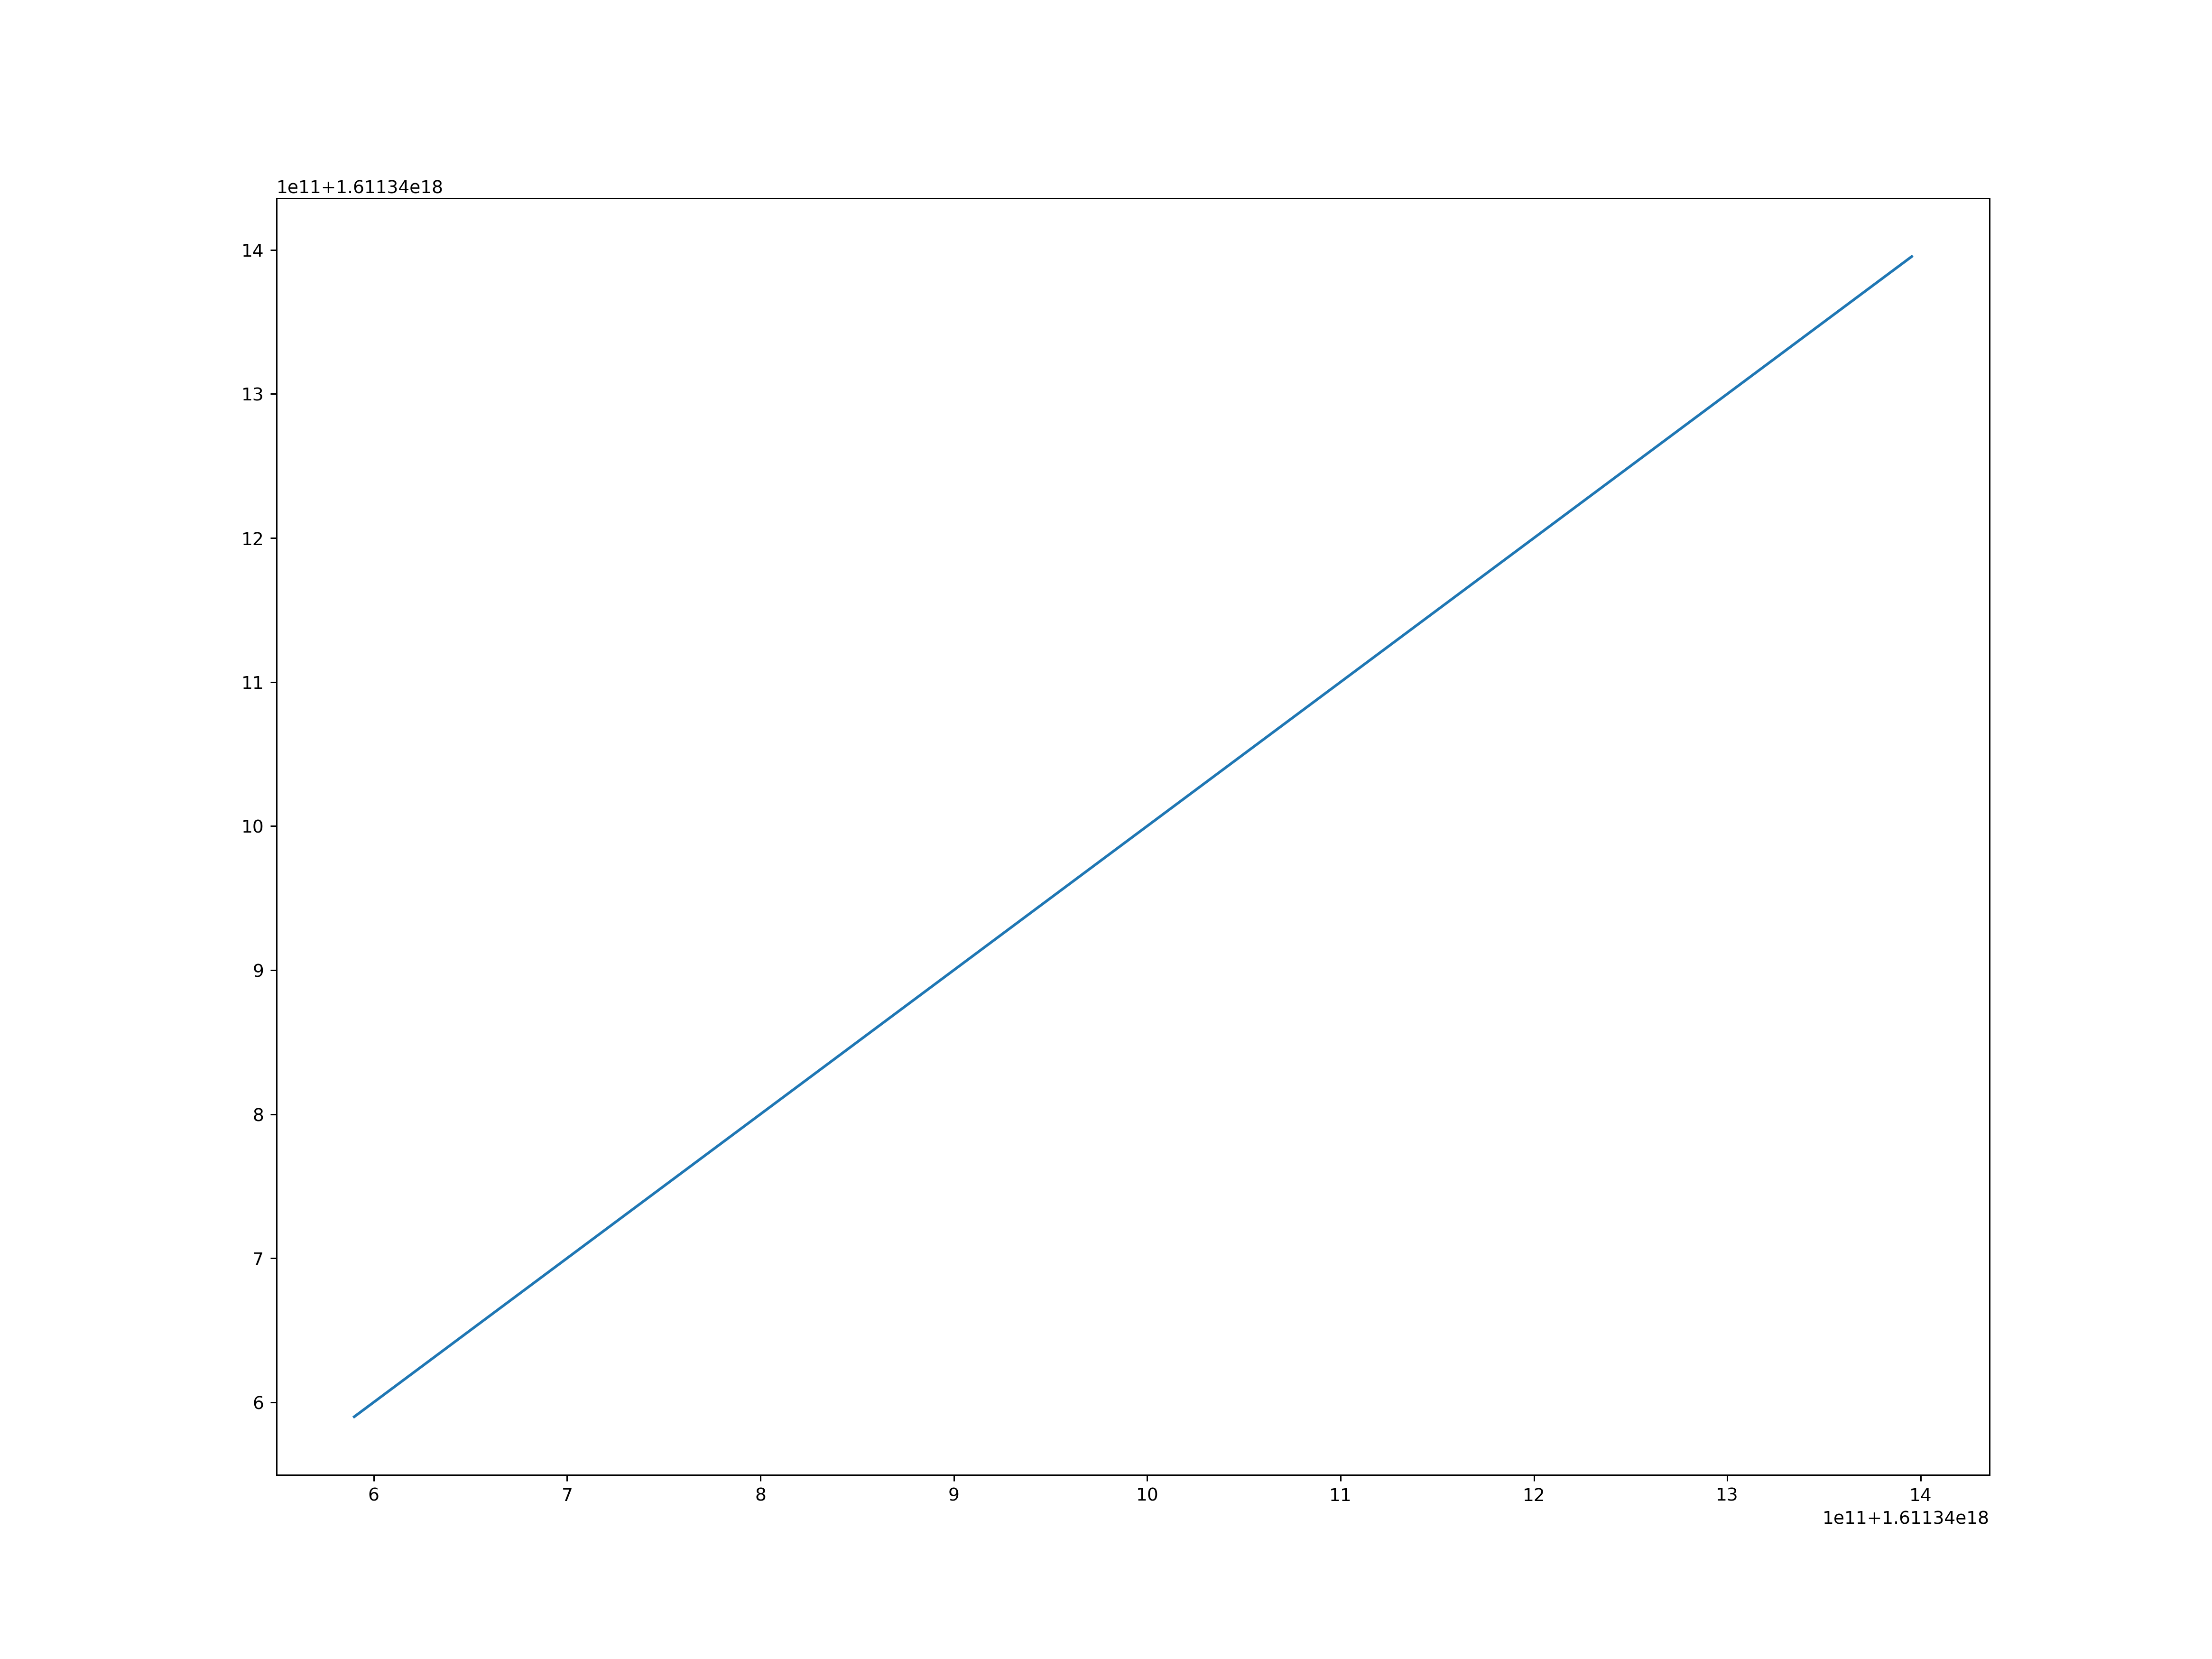

In [51]:

file_name = '20210122-180108 FD Curve 10'
file = lk.File(directory + file_name + '.h5')
file.fdcurves
d = file['Distance']["Distance 1"].data
dt = file['Distance']["Distance 1"].timestamps
f = file['Force LF']['Trap 2'].data
ft = file['Force LF']['Trap 2'].timestamps
cal = file.force1x.calibration

plt.plot(ft, dt)


In [11]:
import matplotlib.pyplot as plt
import lumicks.pylake as lk
%matplotlib notebook

file_name = '20210122-180057 FD Curve 11'
file = lk.File(directory + file_name + '.h5')
newlist = []
for i in file.fdcurves.keys():
    newlist.append(i)  
newlist
fd = file.fdcurves[newlist[0]]



force = []
time = []
distance = []
force = fd.downsampled_force2.data
t1 = fd.downsampled_force2.timestamps
# time = fd.downsampled_force2.timestamps
time = (t1 - t1[0]) * 1e-9 
distance = fd.d.data




%matplotlib notebook
plt.figure(figsize=(2.5, 1.5))
plt.rcParams['font.size'] = 6
plt.rcParams['figure.figsize'] = (9, 6)
plt.plot(distance, force,linewidth = 0.25)
plt.ylabel('Force (pN)')
plt.xlabel('Distance (um)')
plt.show()
plt.savefig(file_name+'force v distance'+'.svg')
# plt.savefig(file_name+' FD plot.png',bbox_inches='tight', pad_inches=0.1)

plt.figure(figsize=(2.5, 1.5))
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (9, 6)
plt.plot(time, force)
plt.ylabel('Force (pN)')
plt.xlabel('Time (s)')
plt.show()
# plt.savefig(file_name+' FT plot.png',bbox_inches='tight', pad_inches=0.1)


IndexError: list index out of range

In [48]:
5, 15, 25, 30, 35

[]

If the file contains a forward and reverse FD curve, split into two halves (foward and reverse) and use for fitting 

<IPython.core.display.Javascript object>


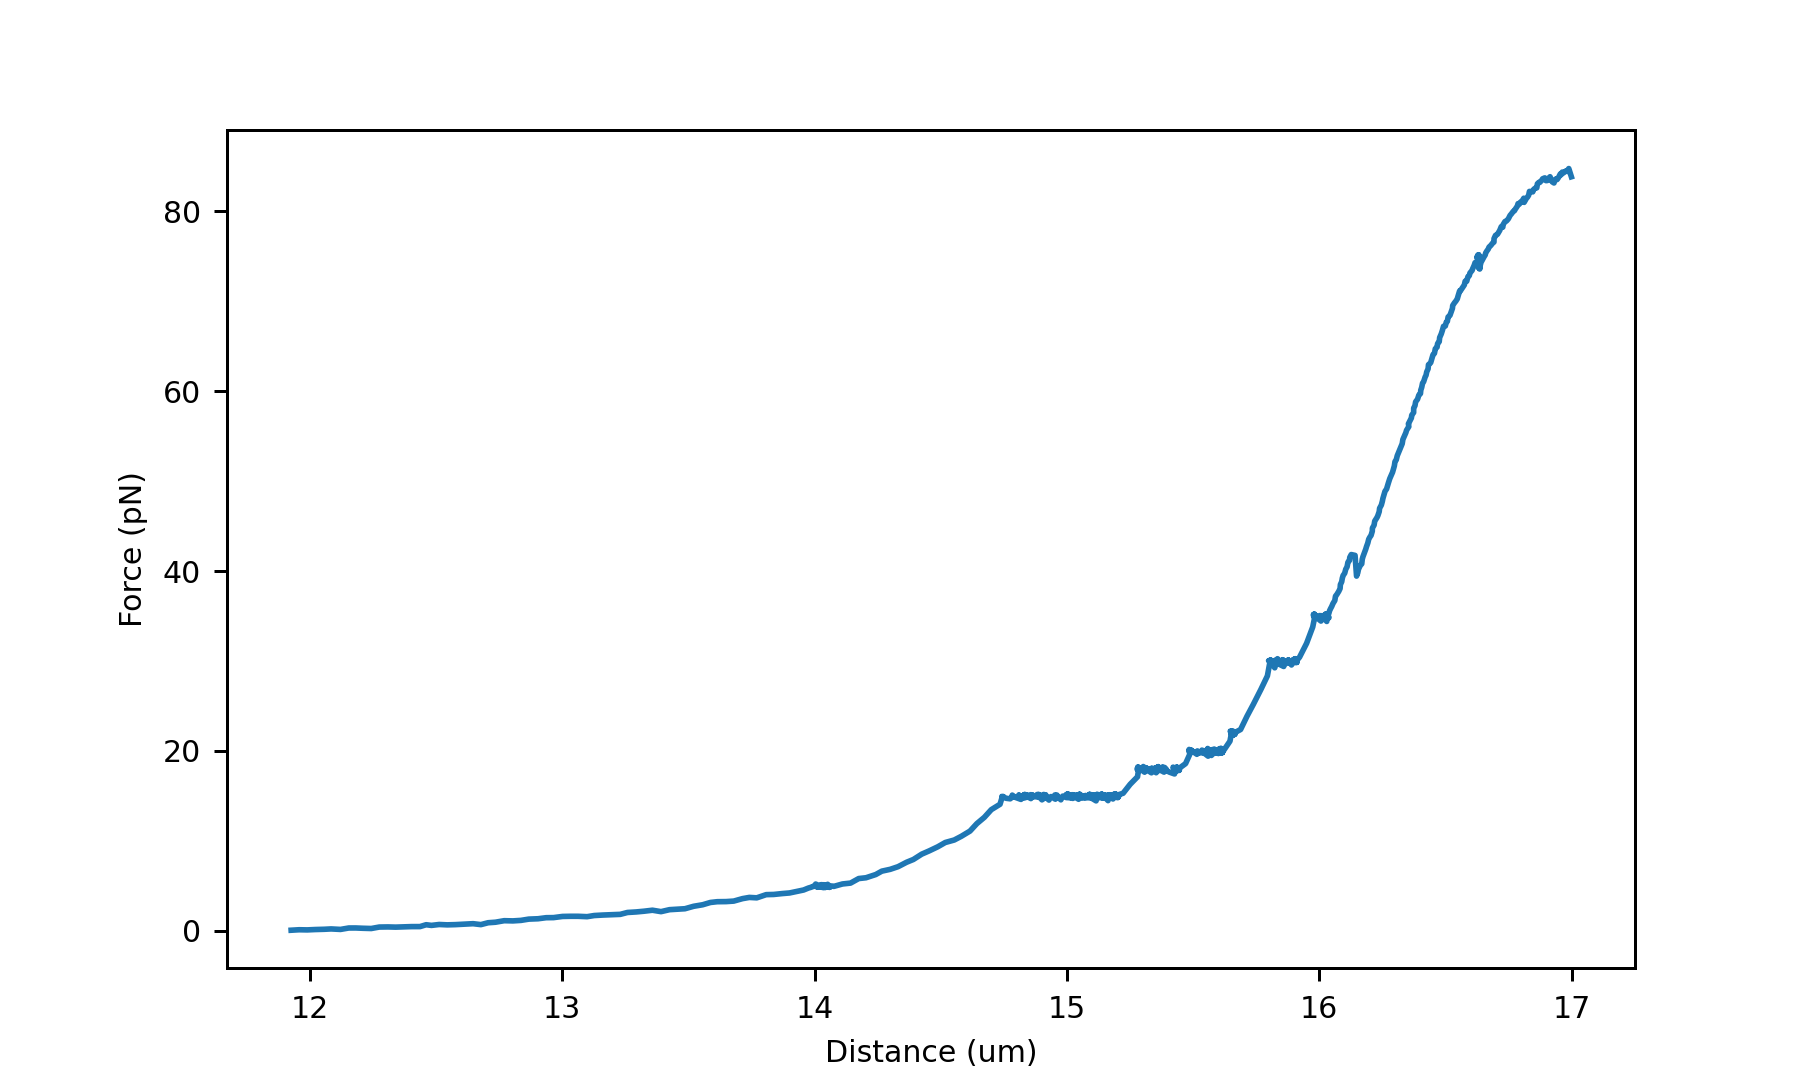

<IPython.core.display.Javascript object>


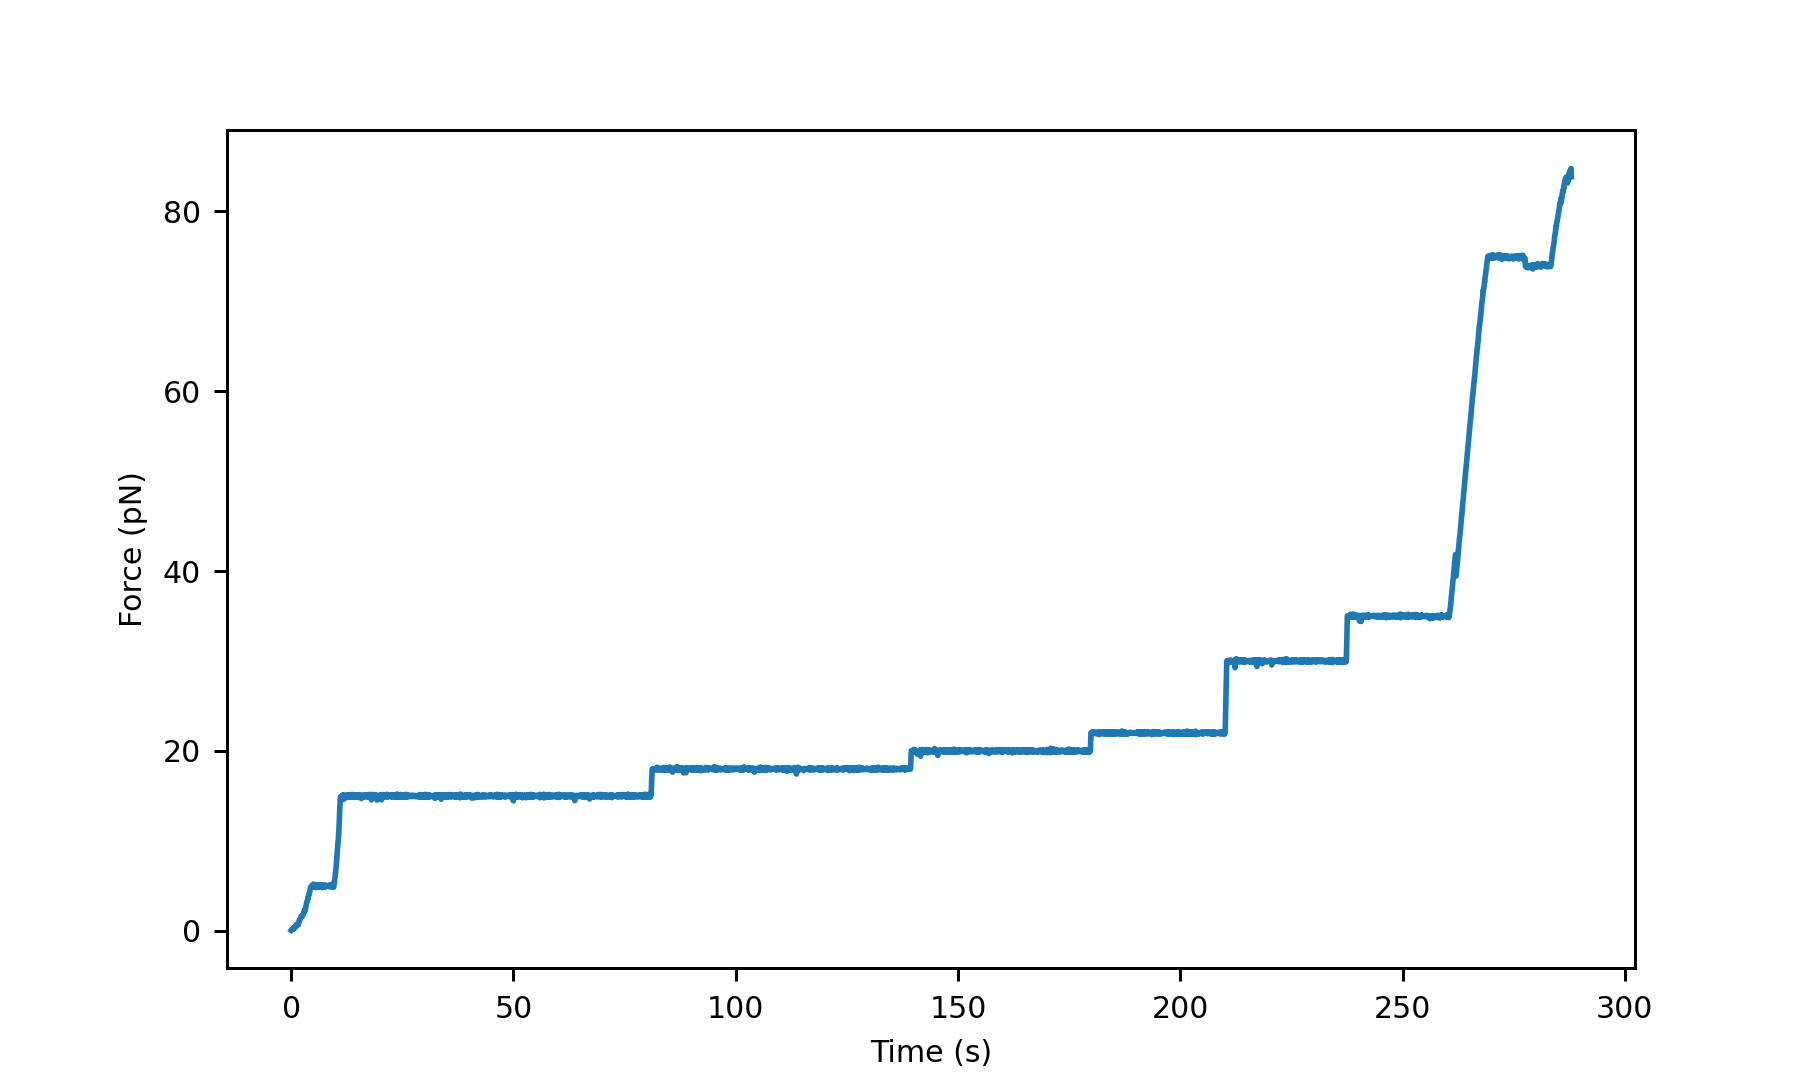

In [11]:
# FORWARD
# time_to_cut = 225
time_to_cut = 288


%matplotlib notebook
plt.figure(figsize=(2.5, 1.5))
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (9, 6)
# plt.plot(distance[time > time_to_cut], force[time > time_to_cut])
plt.plot(distance[time < time_to_cut], force[time < time_to_cut])
plt.ylabel('Force (pN)')
plt.xlabel('Distance (um)')
plt.show()
plt.savefig(file_name+'force v distance forward'+'.svg')
# plt.savefig(file_name+' split reverse FD plot.png',bbox_inches='tight', pad_inches=0.1)
# plt.savefig(file_name+' split reverse FD plot.png',bbox_inches='tight', pad_inches=0.1)

plt.figure(figsize=(2.5, 1.5))
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (9, 6)
# plt.plot(time[time > time_to_cut], force[time > time_to_cut])
plt.plot(time[time < time_to_cut], force[time < time_to_cut])
plt.ylabel('Force (pN)')
plt.xlabel('Time (s)')
plt.show()
# plt.savefig(file_name+' split reserve FT plot.png',bbox_inches='tight', pad_inches=0.1)
# plt.savefig(file_name+' split reserve FT plot.png',bbox_inches='tight', pad_inches=0.1)

<IPython.core.display.Javascript object>


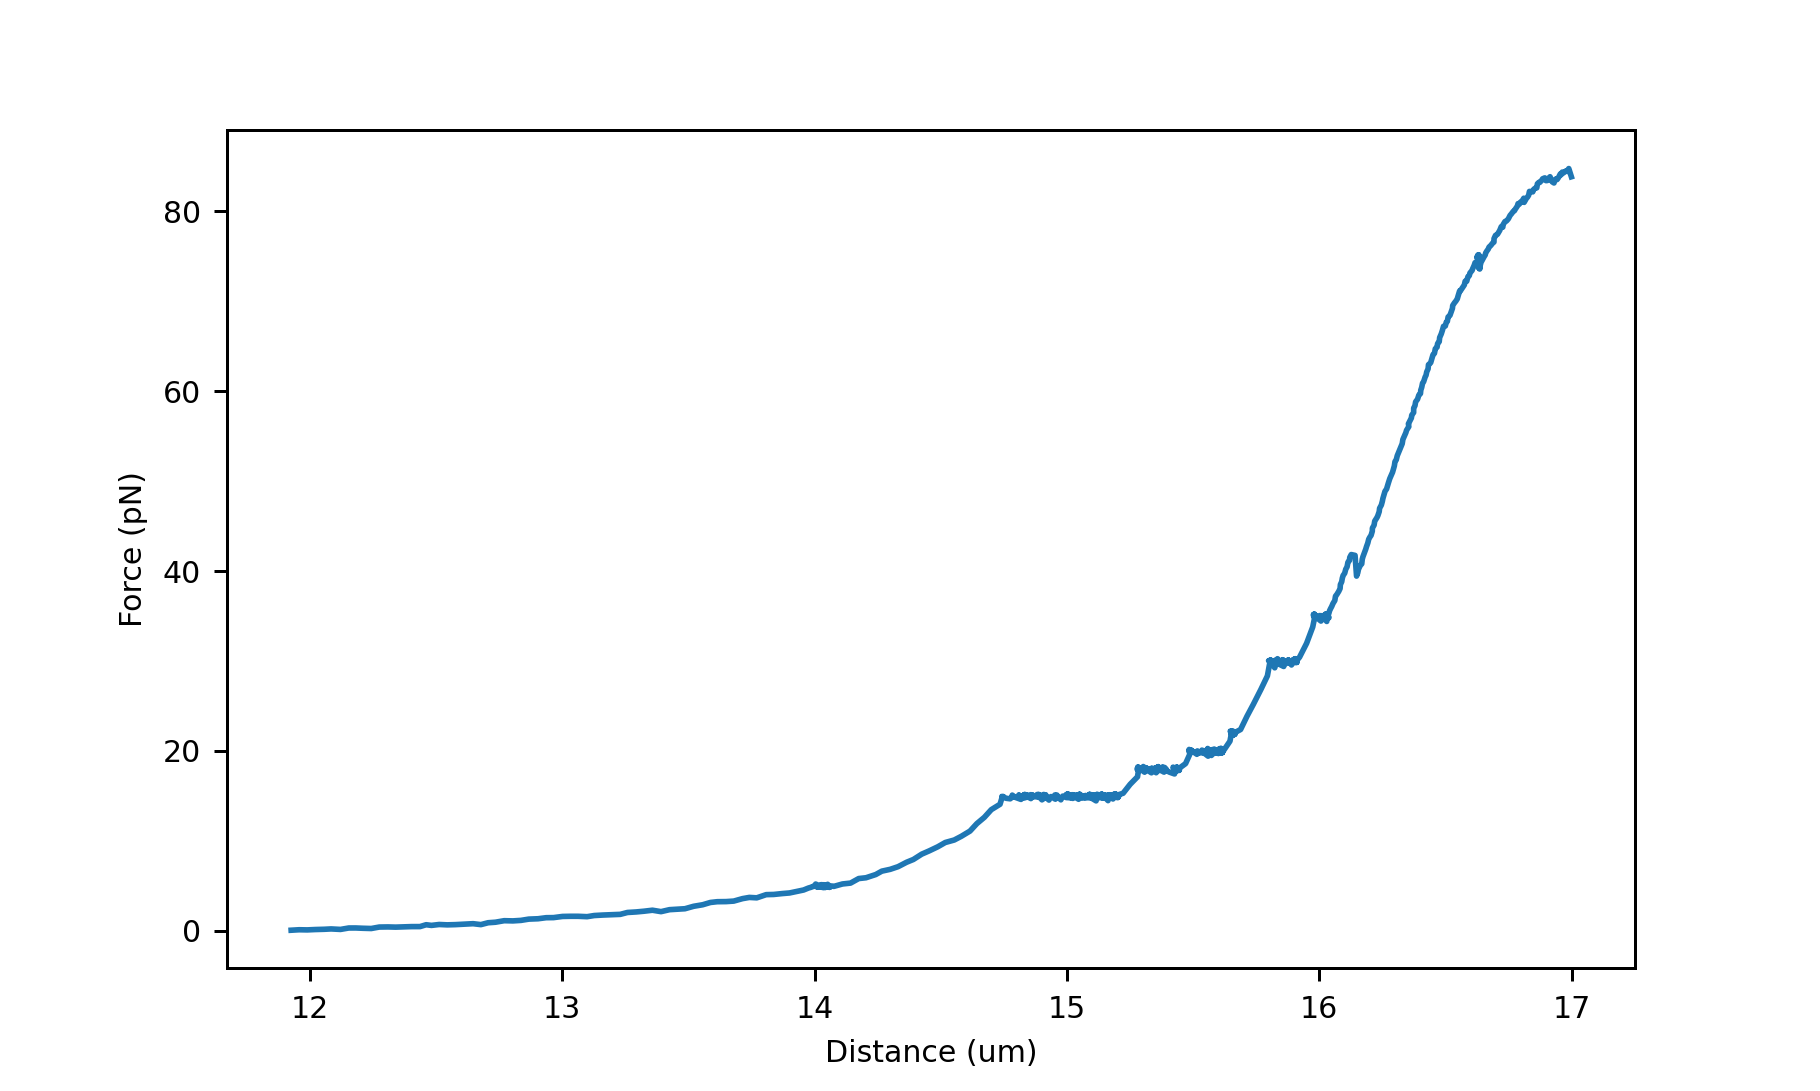

<IPython.core.display.Javascript object>


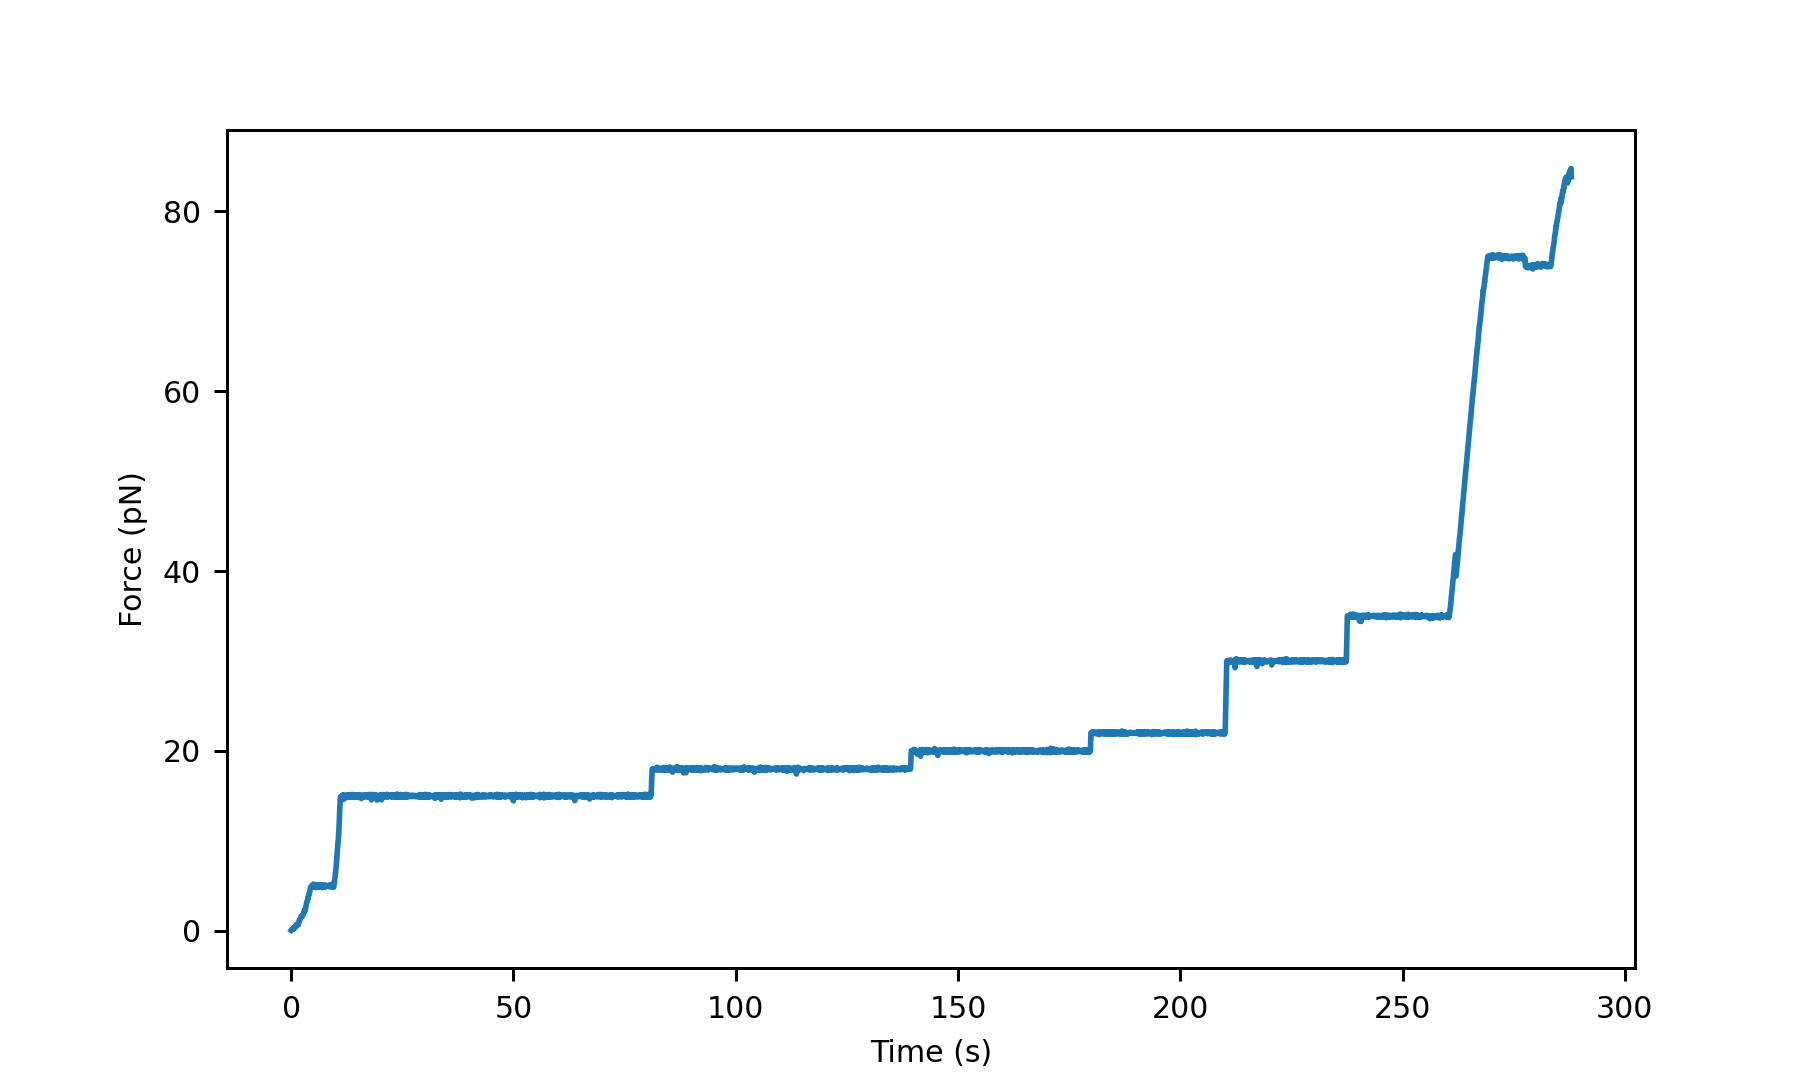

In [13]:
# REVERSE
%matplotlib notebook
plt.figure(figsize=(2.5, 1.5))
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (9, 6)
# plt.plot(distance[time > time_to_cut], force[time > time_to_cut])
plt.plot(distance[time < time_to_cut], force[time < time_to_cut])
plt.ylabel('Force (pN)')
plt.xlabel('Distance (um)')
plt.show()
# plt.savefig(file_name+'force v distance forward'+'.svg')

# plt.savefig(file_name+' split reverse FD plot.png',bbox_inches='tight', pad_inches=0.1)
# plt.savefig(file_name+' split reverse FD plot.png',bbox_inches='tight', pad_inches=0.1)

plt.figure(figsize=(2.5, 1.5))
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (9, 6)
# plt.plot(time[time > time_to_cut], force[time > time_to_cut])
plt.plot(time[time < time_to_cut], force[time < time_to_cut])
plt.ylabel('Force (pN)')
plt.xlabel('Time (s)')
plt.show()
# plt.savefig(file_name+' split reserve FT plot.png',bbox_inches='tight', pad_inches=0.1)
# plt.savefig(file_name+' split reserve FT plot.png',bbox_inches='tight', pad_inches=0.1)

In [14]:
force_mod.round(2)[110:115]
fcs_min, fcs_t_first

NameError: name 'force_mod' is not defined

In [15]:
from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages(file_name+'time v distance'+'.pdf')

force_mod = force[time < time_to_cut]
distance_mod = distance[time < time_to_cut]
time_mod = time[time < time_to_cut]

# force_mod = force
# distance_mod = distance
# time_mod = time
# fcs = [5, 15, 18, 20, 25, 30]
fcs = [5, 15, 20, 30]

fcs_min = []
fcs_max = []
fcs_t_first = []
fcs_t_last = []
indicies_masks = []
fcs_min_i = []
fcs_max_i = []


for x in fcs:
    mask = (force_mod.round(0)==x)
    indicies_masks.append([i for i, x in enumerate(mask) if x])
    fcs_min.append(distance[indicies_masks[-1][0]:indicies_masks[-1][-1]].min())
    fcs_max.append(distance[indicies_masks[-1][0]:indicies_masks[-1][-1]].max())
    fcs_min_i.append(np.where(distance == distance[indicies_masks[-1][0]:indicies_masks[-1][-1]].min())[0][0])
    fcs_max_i.append(np.where(distance == distance[indicies_masks[-1][0]:indicies_masks[-1][-1]].max())[0][0])
    fcs_t_first.append(indicies_masks[-1][0])
    fcs_t_last.append(indicies_masks[-1][-1])
    plt.figure(figsize=(2.5, 1.5))
    plt.rcParams['font.size'] = 6
    plt.rcParams['figure.figsize'] = (9, 6)
#     plt.plot(time_mod[mask], distance_mod[mask], linewidth = 0.25)
    plt.plot(time_mod[fcs_min_i[-1]:fcs_max_i[-1]], distance_mod[fcs_min_i[-1]:fcs_max_i[-1]]*1000, linewidth = 0.25)
    plt.ylabel('distance (um)')
    plt.xlabel('time (s)')
    plt.title('force clamp is ' +str(x) +'pN')
    plt.show()
    plt.savefig(file_name+'force clamp is ' +str(x) +'pN'+'time v distance'+'.svg')
#     pp.savefig(bbox_inches='tight', pad_inches=0)
    
# pp.close()
fcs, fcs_min, fcs_max, fcs_t_first, fcs_t_last, distance[fcs_t_first], distance[fcs_t_last]

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


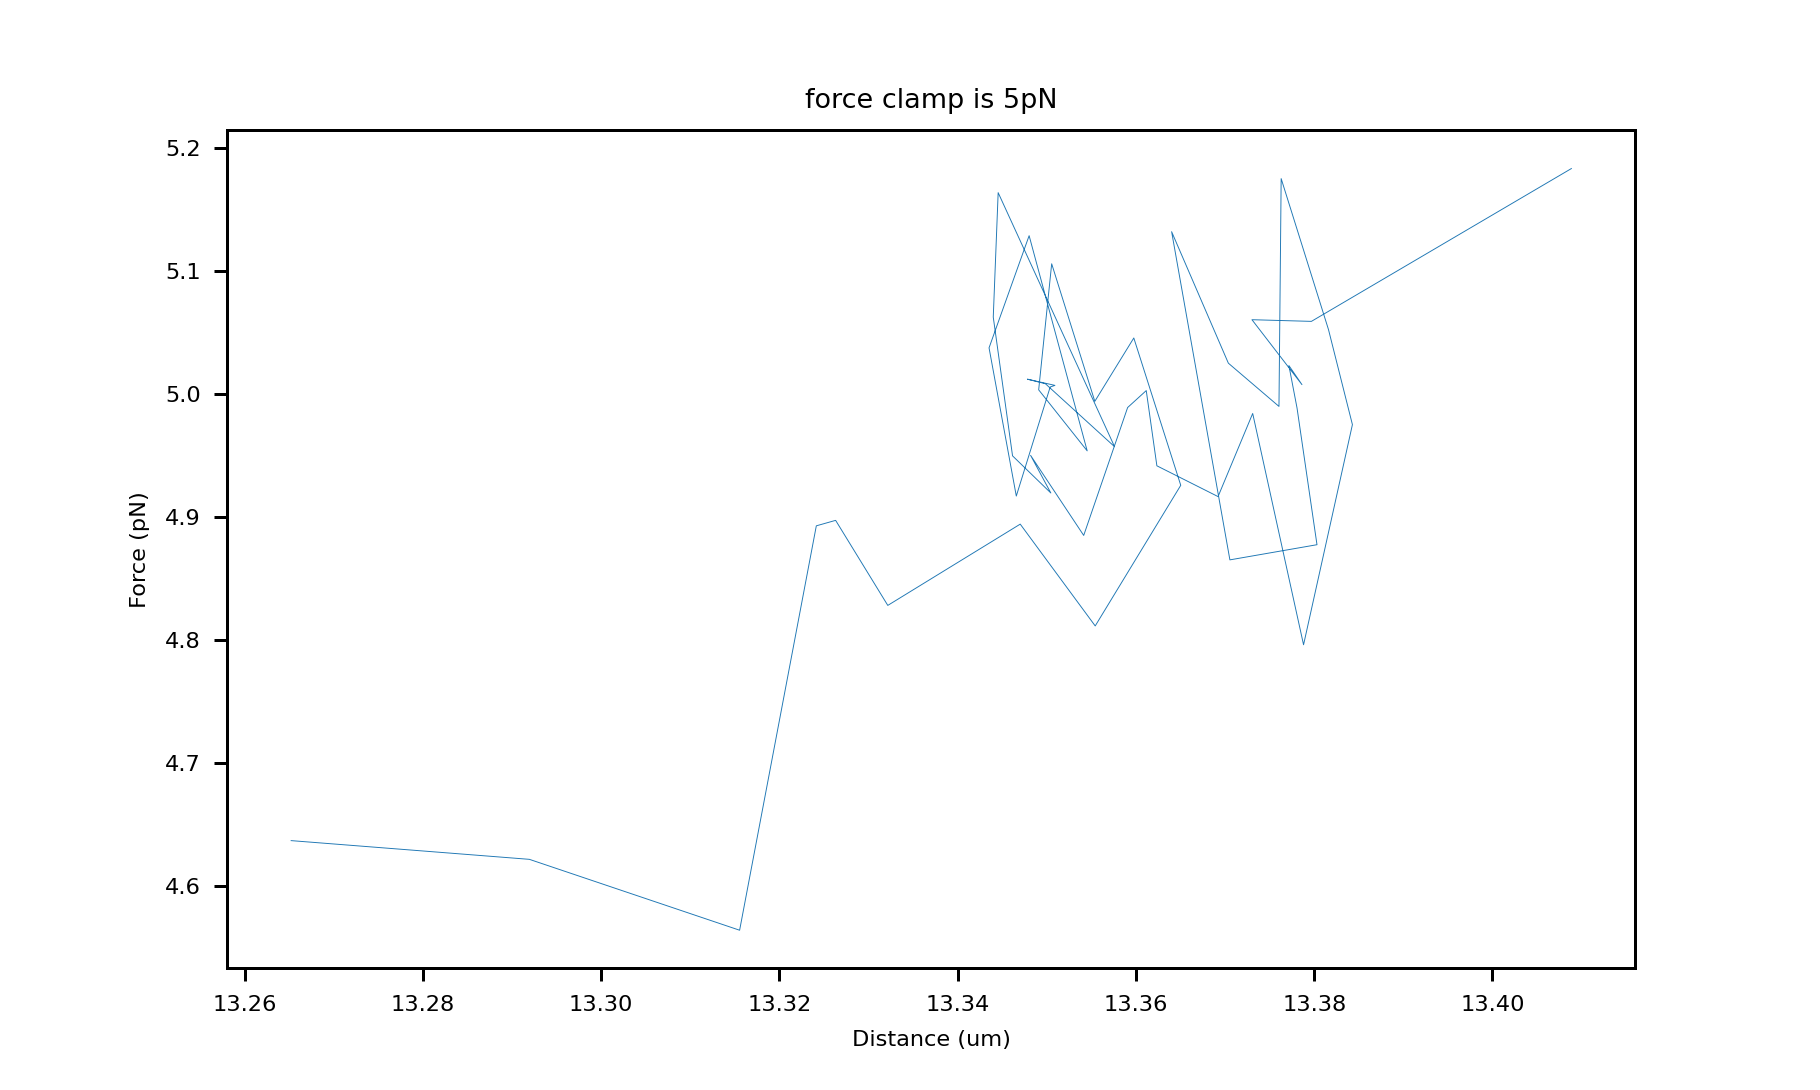

<IPython.core.display.Javascript object>


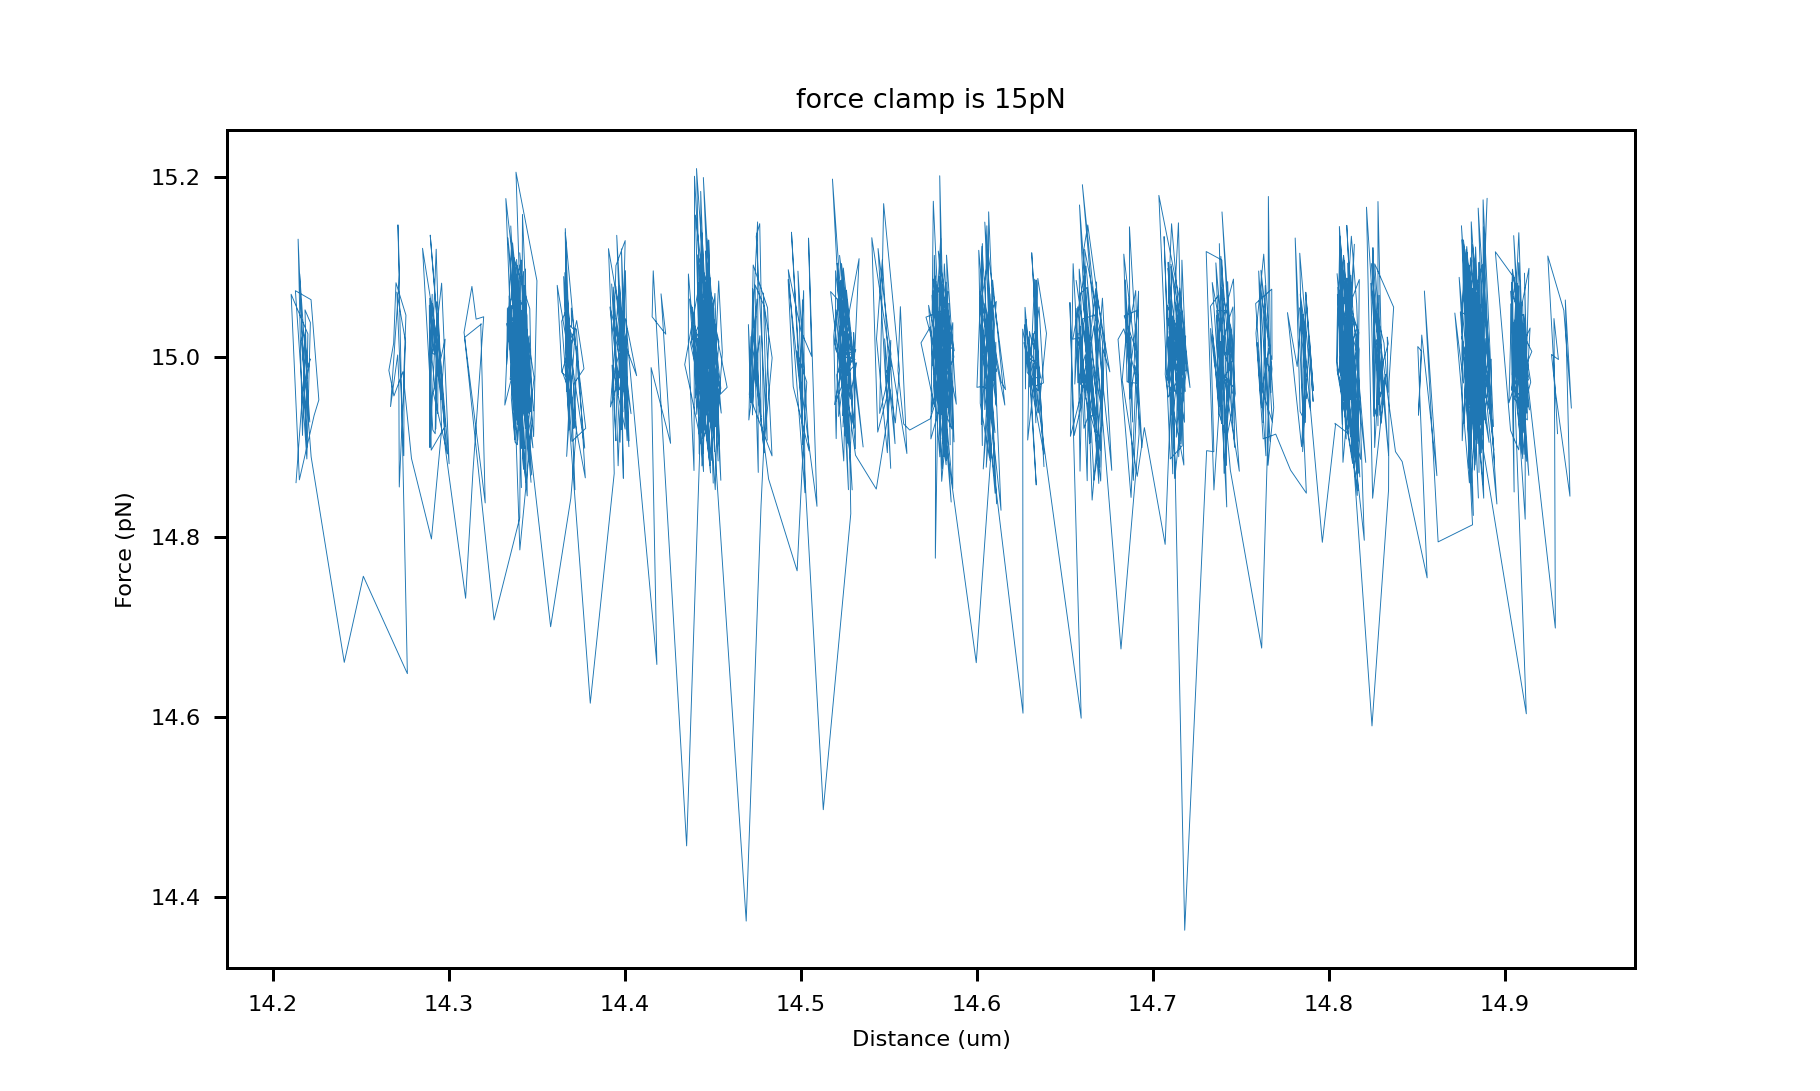

<IPython.core.display.Javascript object>


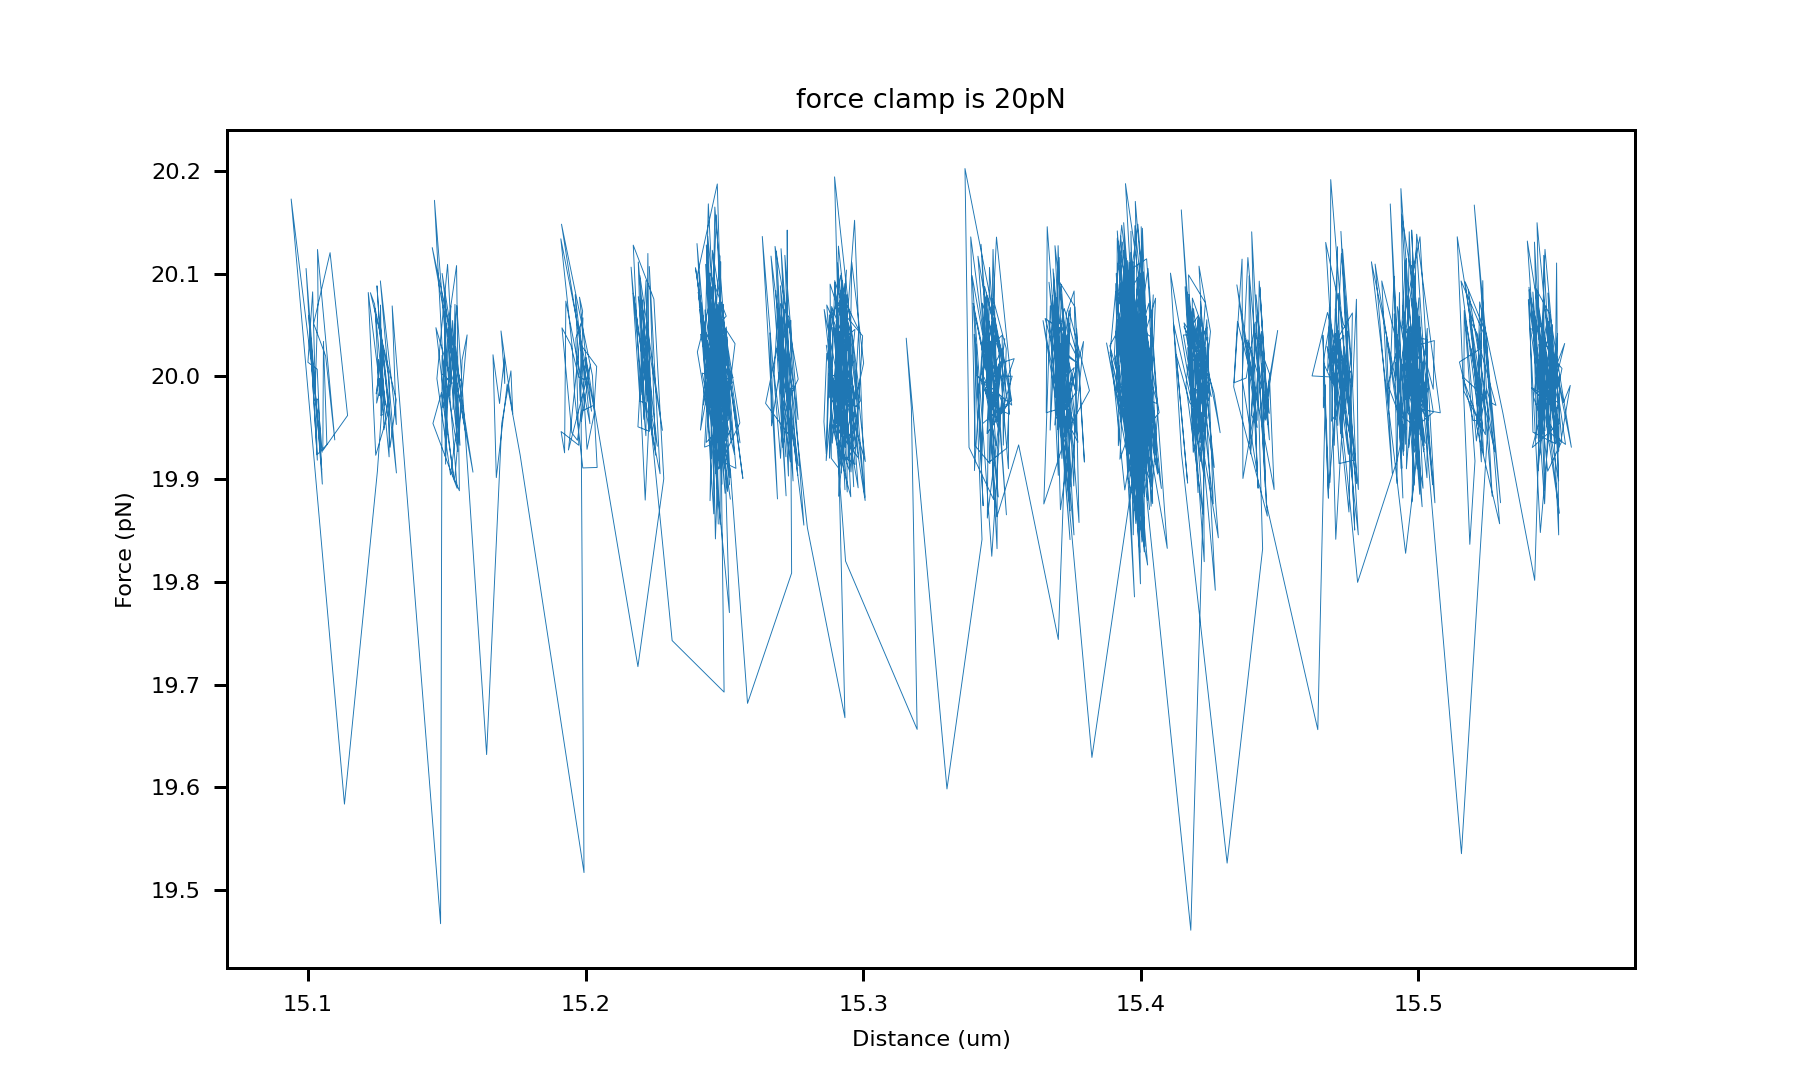

<IPython.core.display.Javascript object>


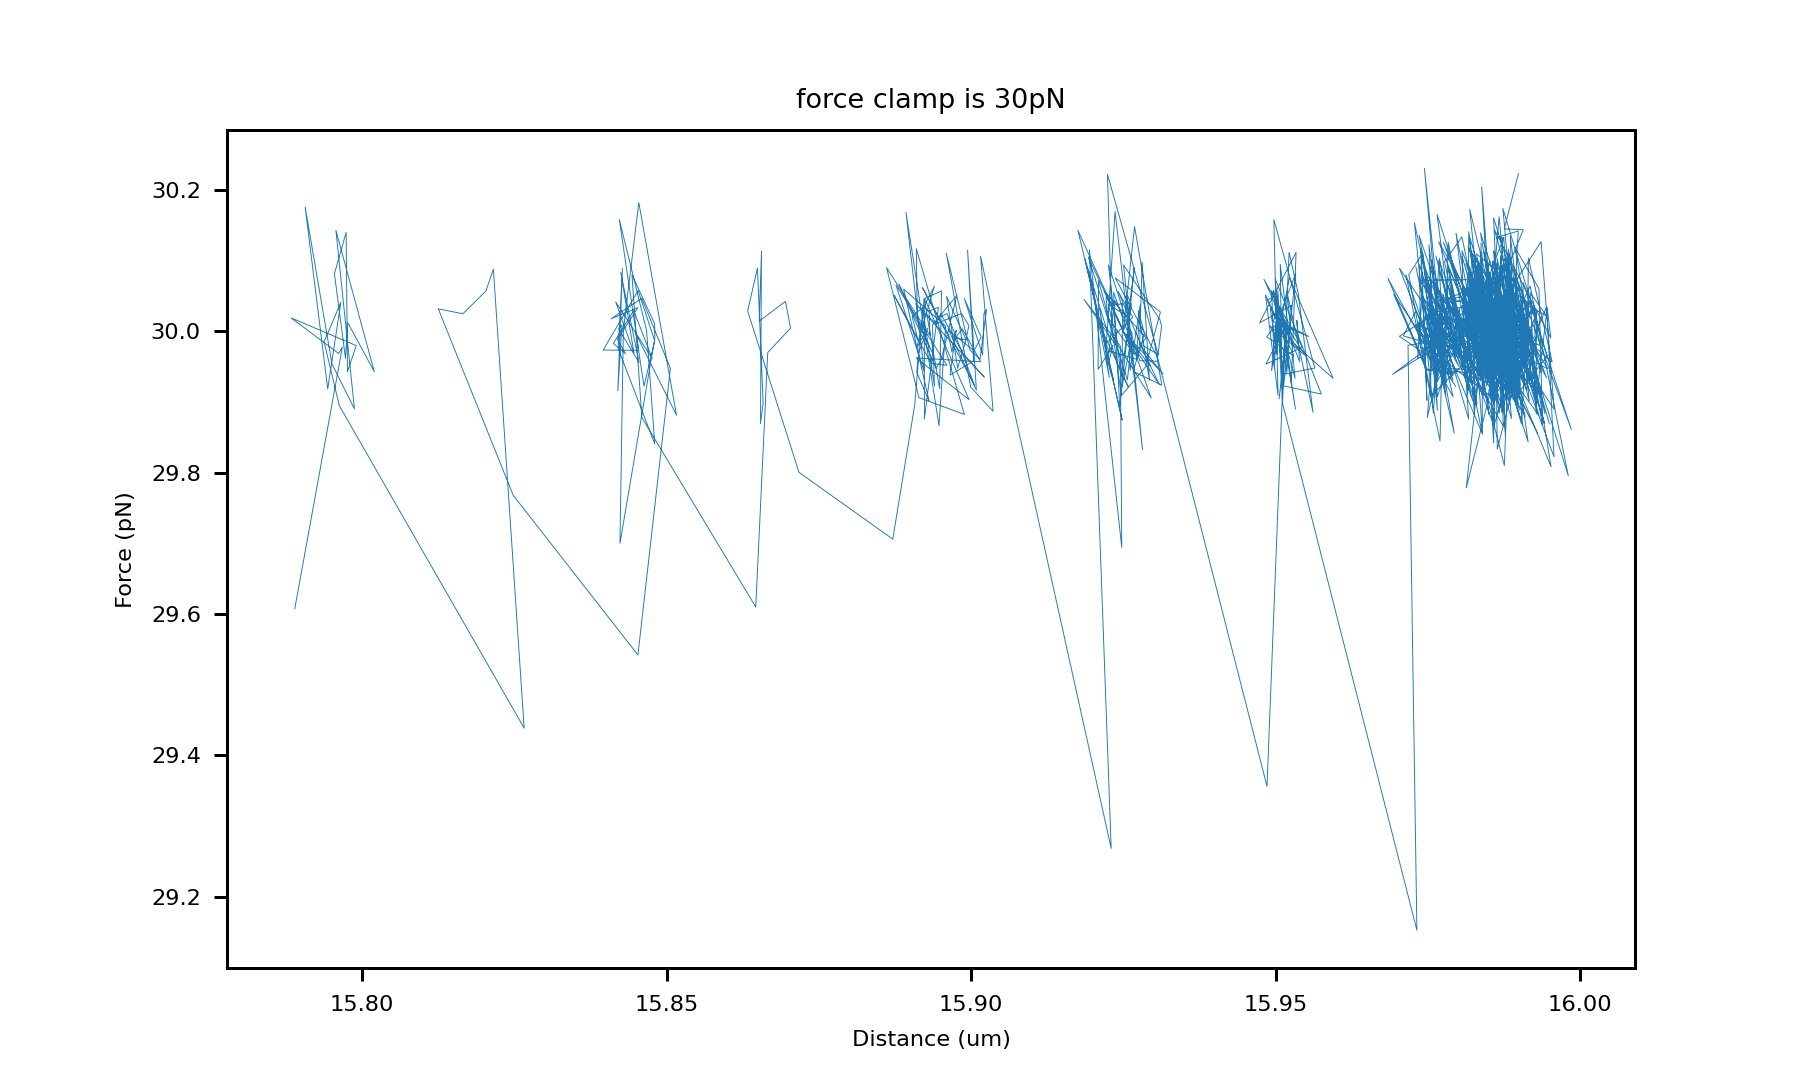

In [78]:
from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages(file_name+'force v distance'+'.pdf')

for i in range(len(fcs)):
    plt.figure(figsize=(2.5, 1.5))
    plt.rcParams['font.size'] = 6
    plt.rcParams['figure.figsize'] =  (9, 6)
    plt.plot(distance_mod[indicies_masks[i][0]:indicies_masks[i][-1]], force_mod[indicies_masks[i][0]:indicies_masks[i][-1]], linewidth=0.25)
    plt.ylabel('Force (pN)')
    plt.xlabel('Distance (um)')
    plt.title('force clamp is ' +str(fcs[i]) +'pN')
    plt.show()
    plt.savefig(file_name+' puff plots force clamp is ' +str(i) +'pN'+'time v distance'+'.svg')
#     pp.savefig(bbox_inches='tight', pad_inches=0)
    
# pp.close()


In [149]:
fcs_max[2], fcs_min[2+1]

(15.626513394886079, 15.667971519993838)

<IPython.core.display.Javascript object>


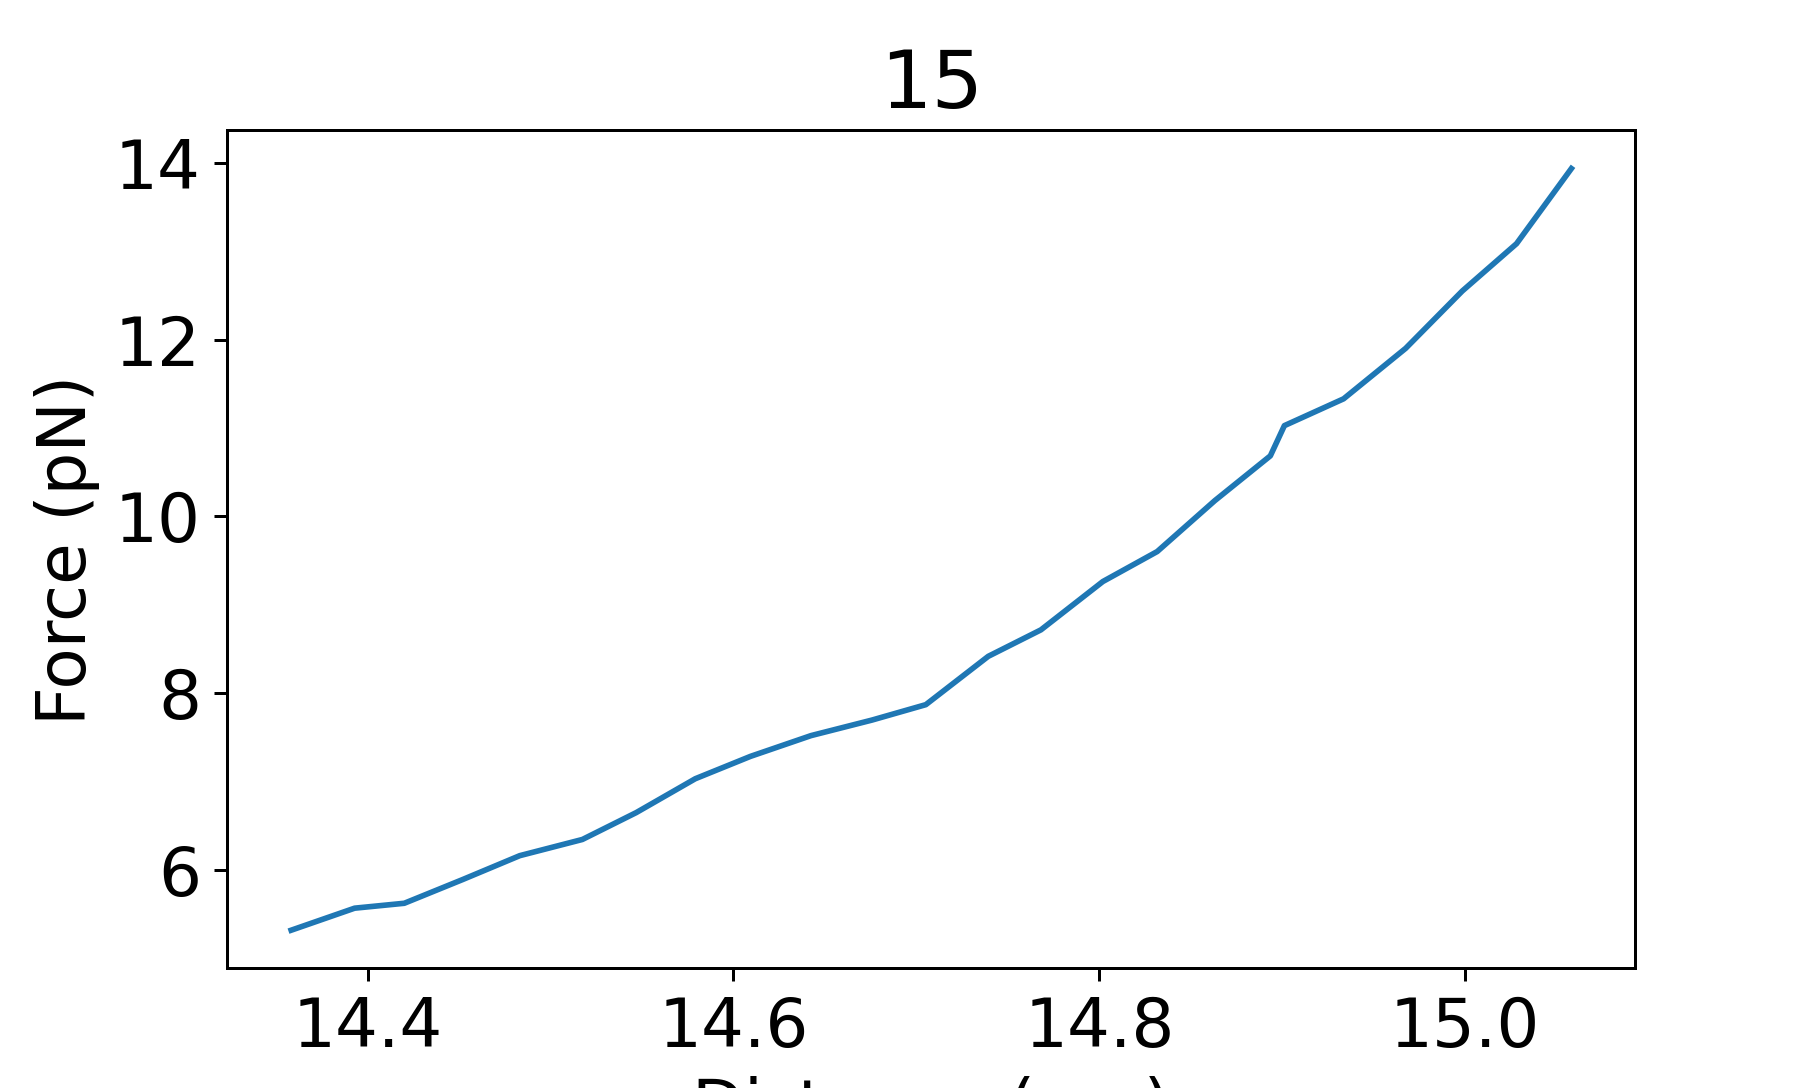

<IPython.core.display.Javascript object>


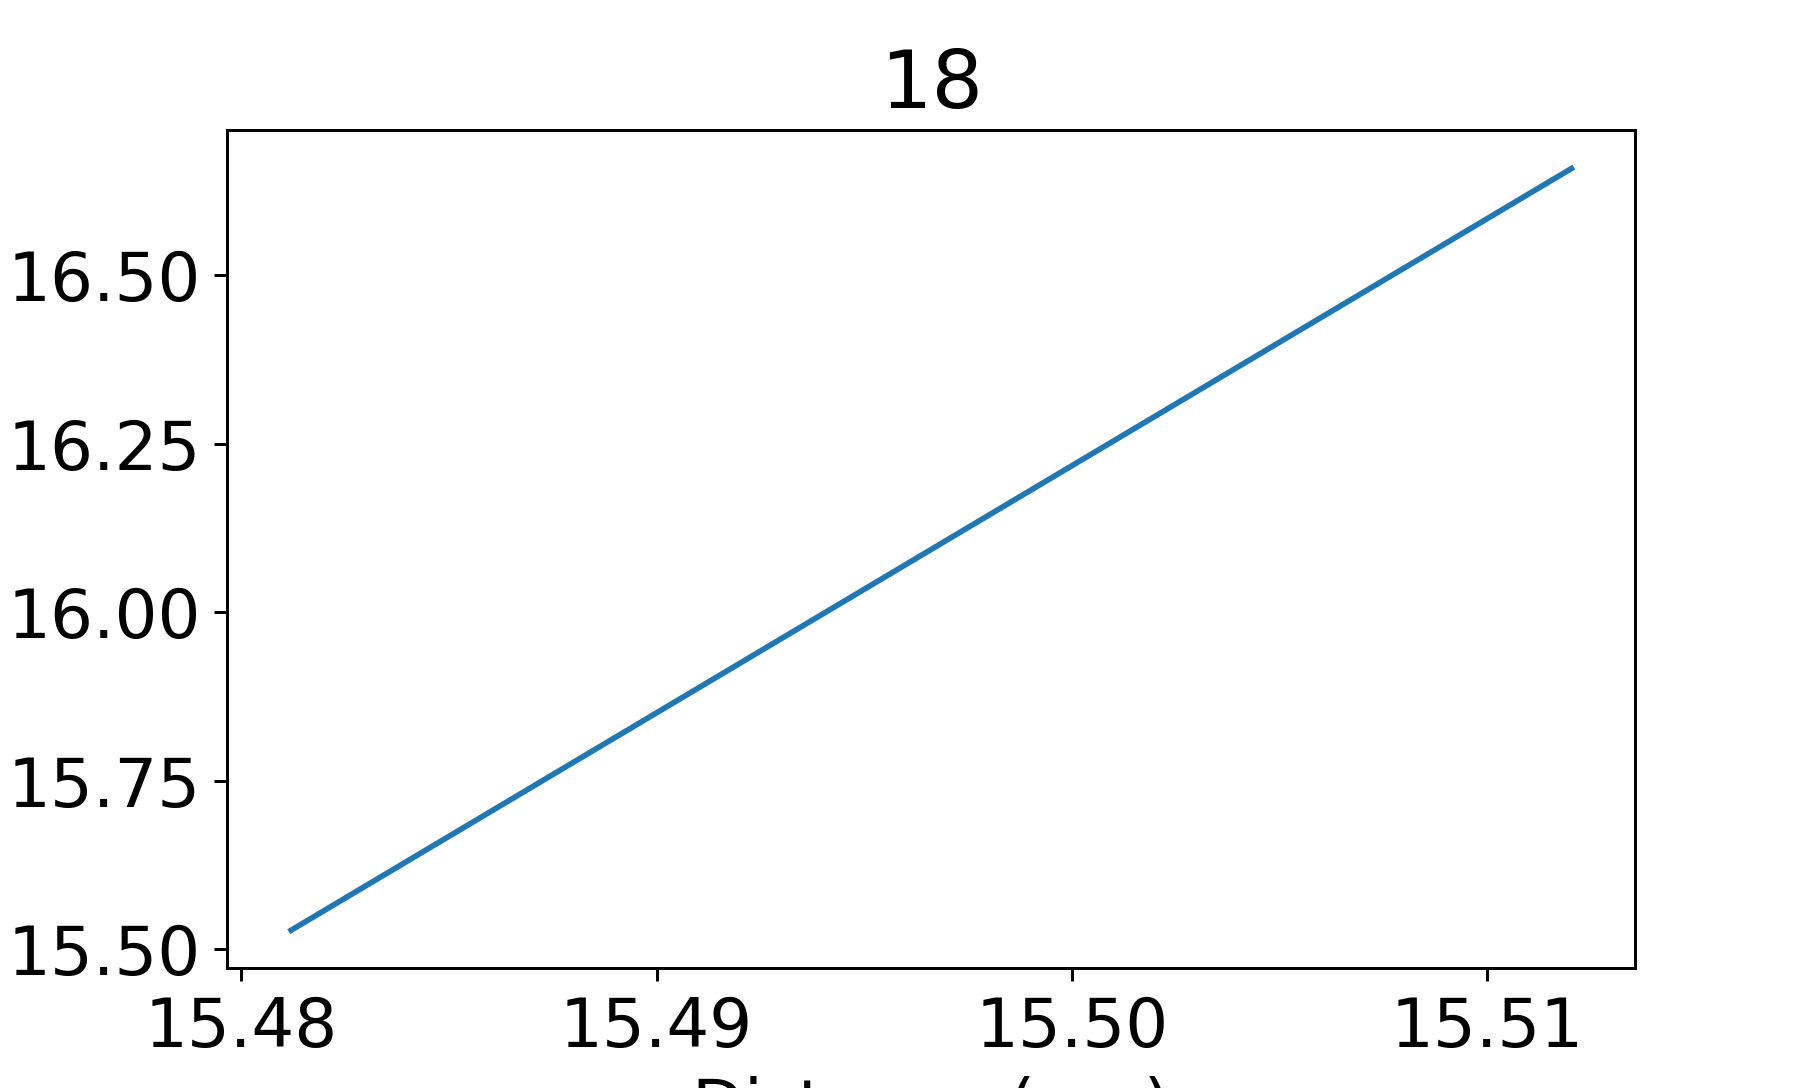

<IPython.core.display.Javascript object>


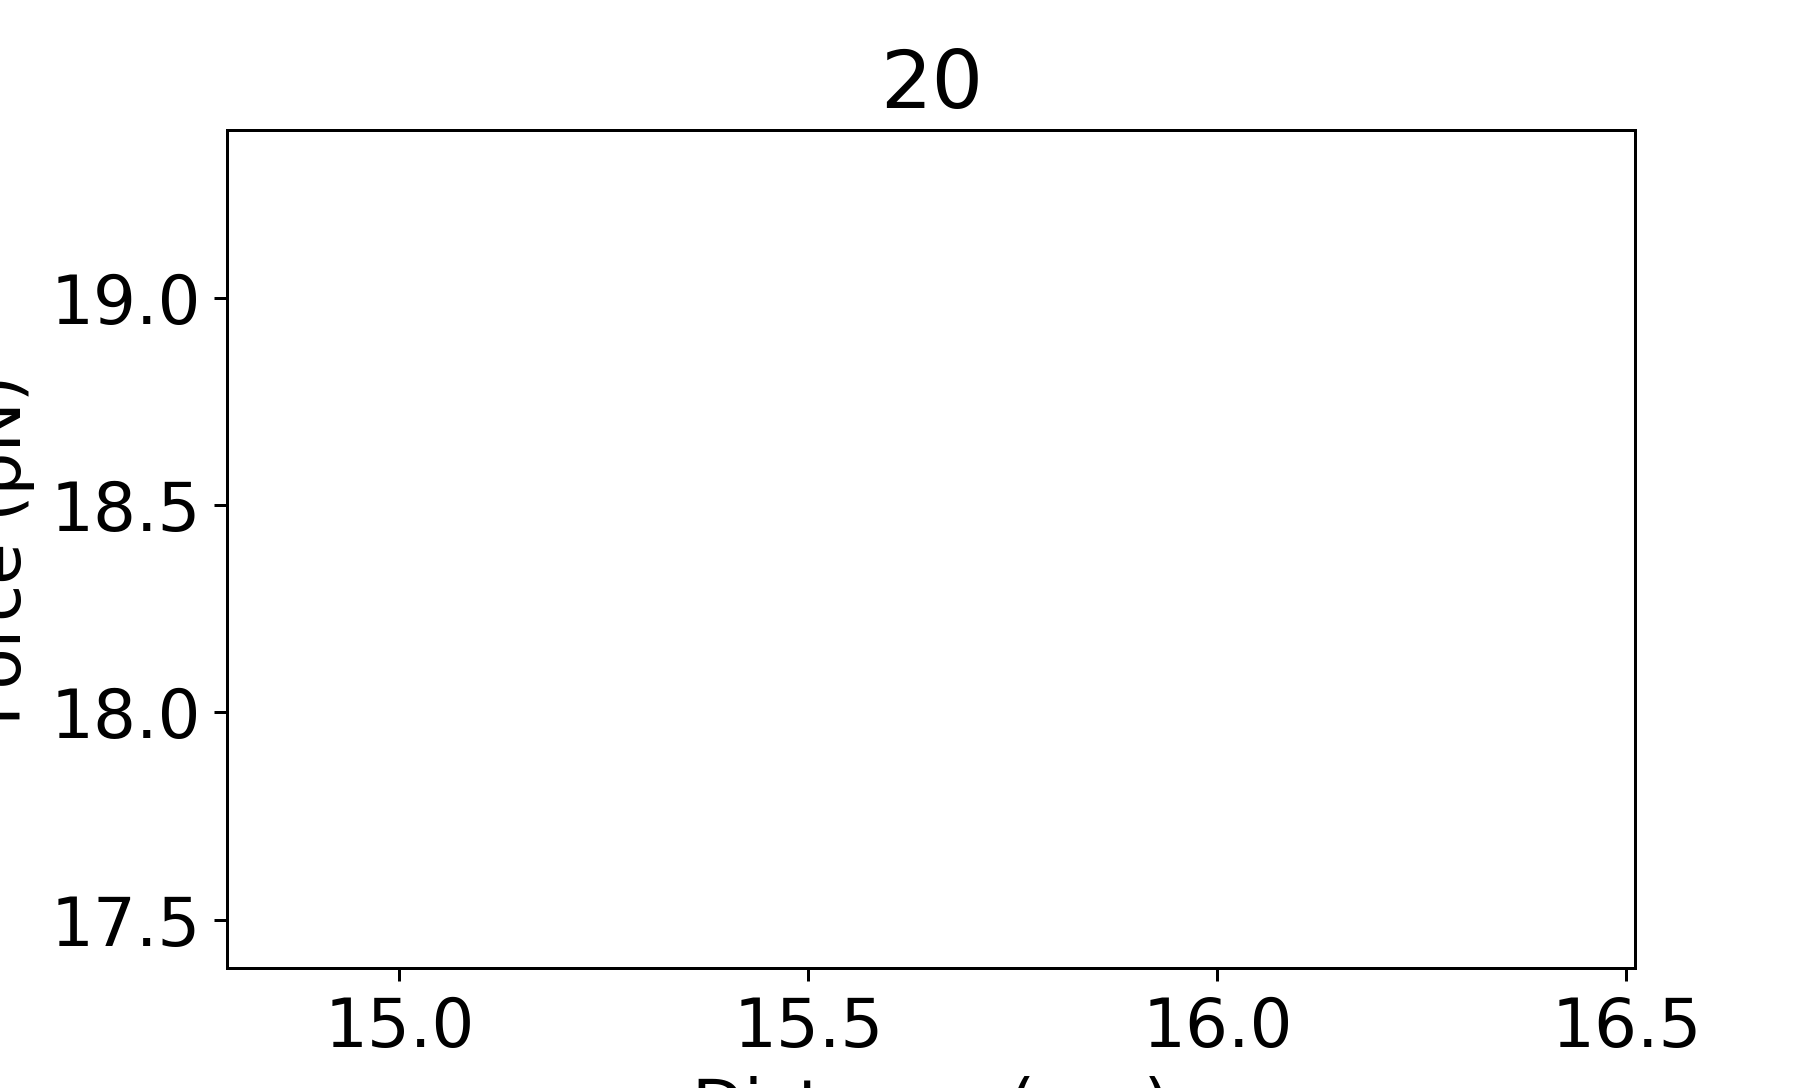

<IPython.core.display.Javascript object>


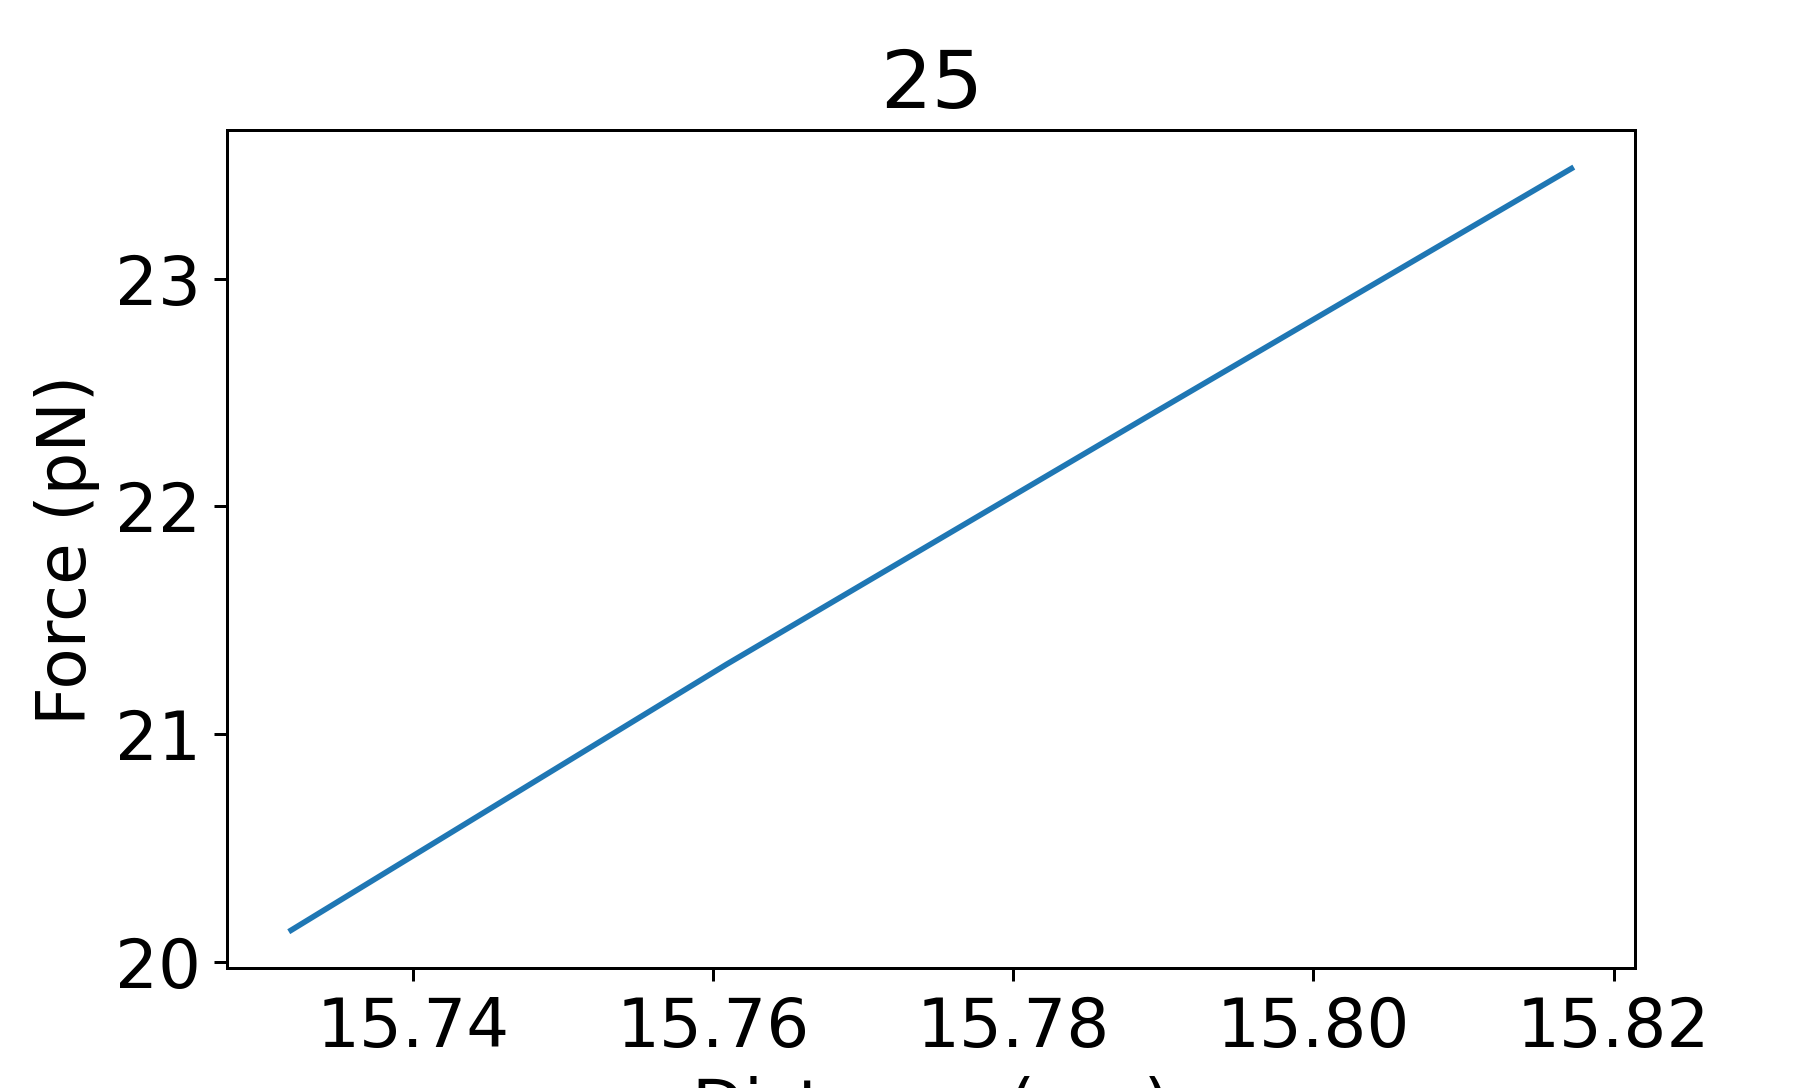

<IPython.core.display.Javascript object>


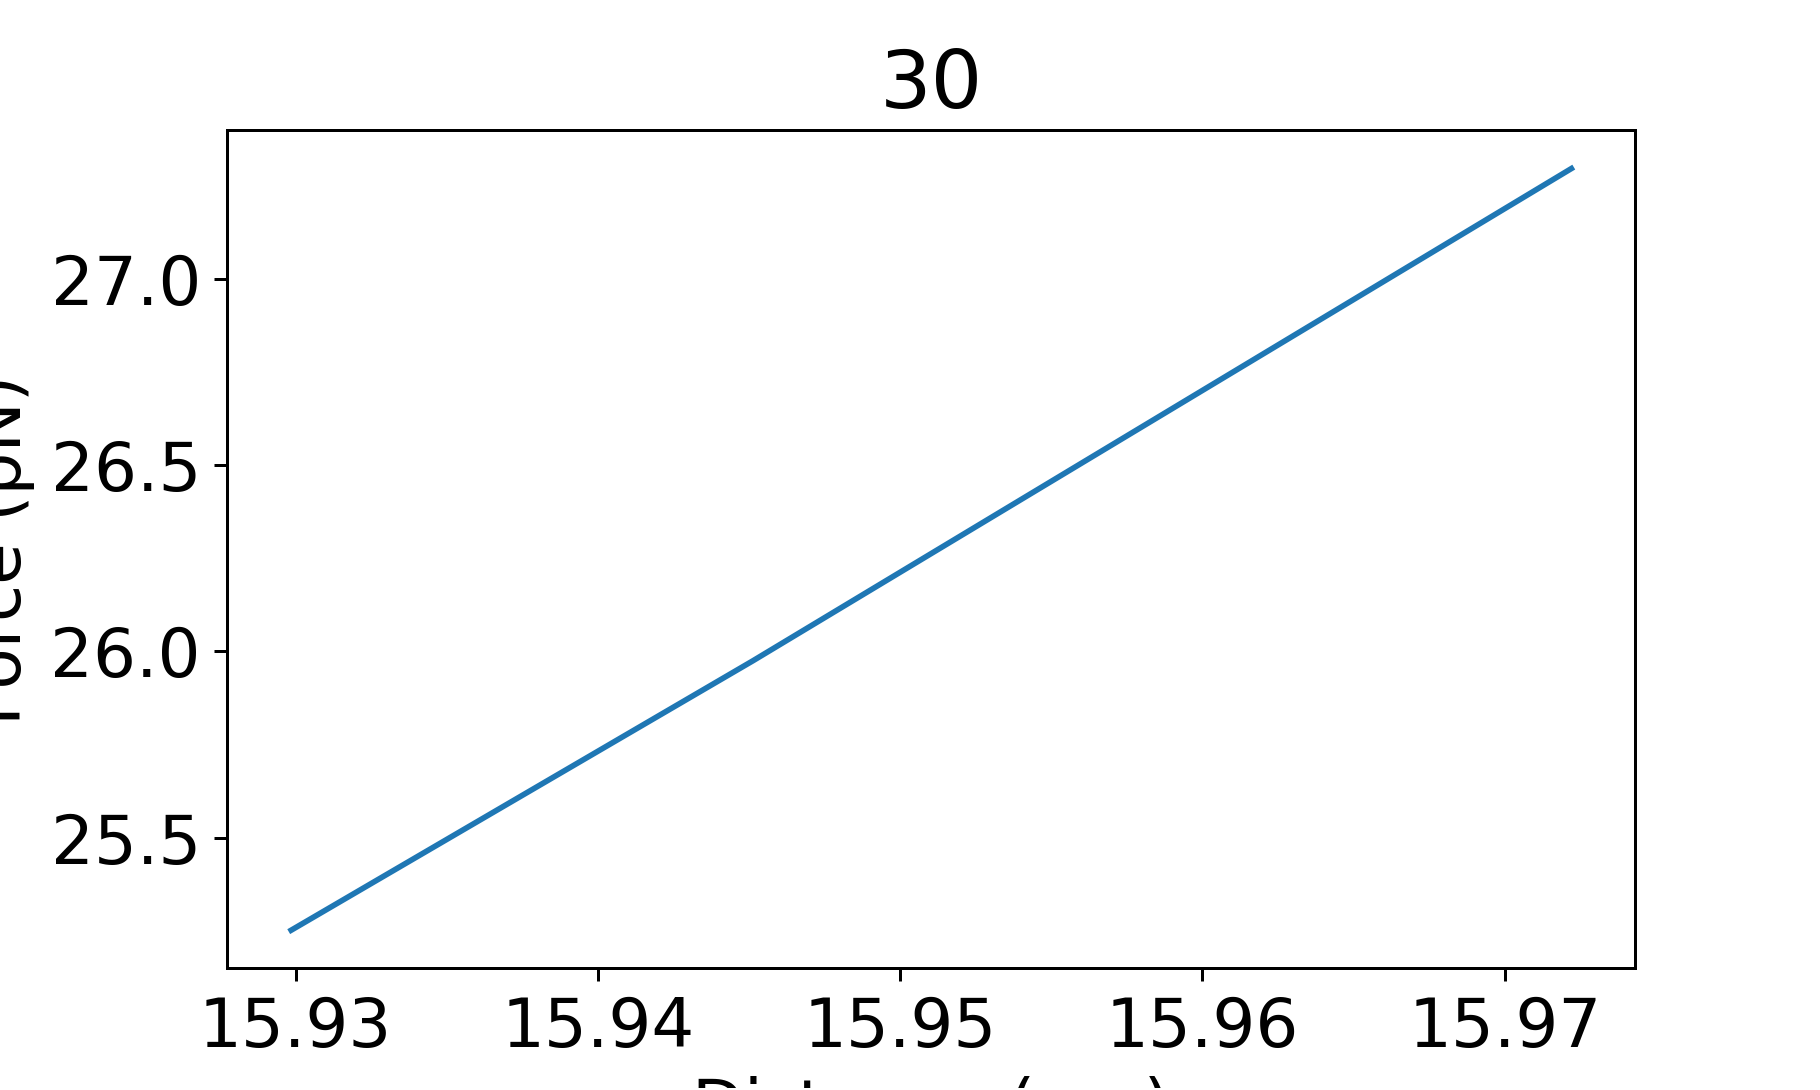

In [150]:
for i in range(len(fcs)-1):
    mask = (distance_mod>fcs_max[i]) & (distance_mod<fcs_min[i+1])
    plt.figure(figsize=(2.5, 1.5))
    plt.rcParams['font.size'] = 18
    plt.rcParams['figure.figsize'] = (9, 6)
    plt.plot(distance_mod[mask], force_mod[mask])
    plt.ylabel('Force (pN)')
    plt.xlabel('Distance (um)')
    plt.show()
    plt.title(fcs[i+1])

<IPython.core.display.Javascript object>


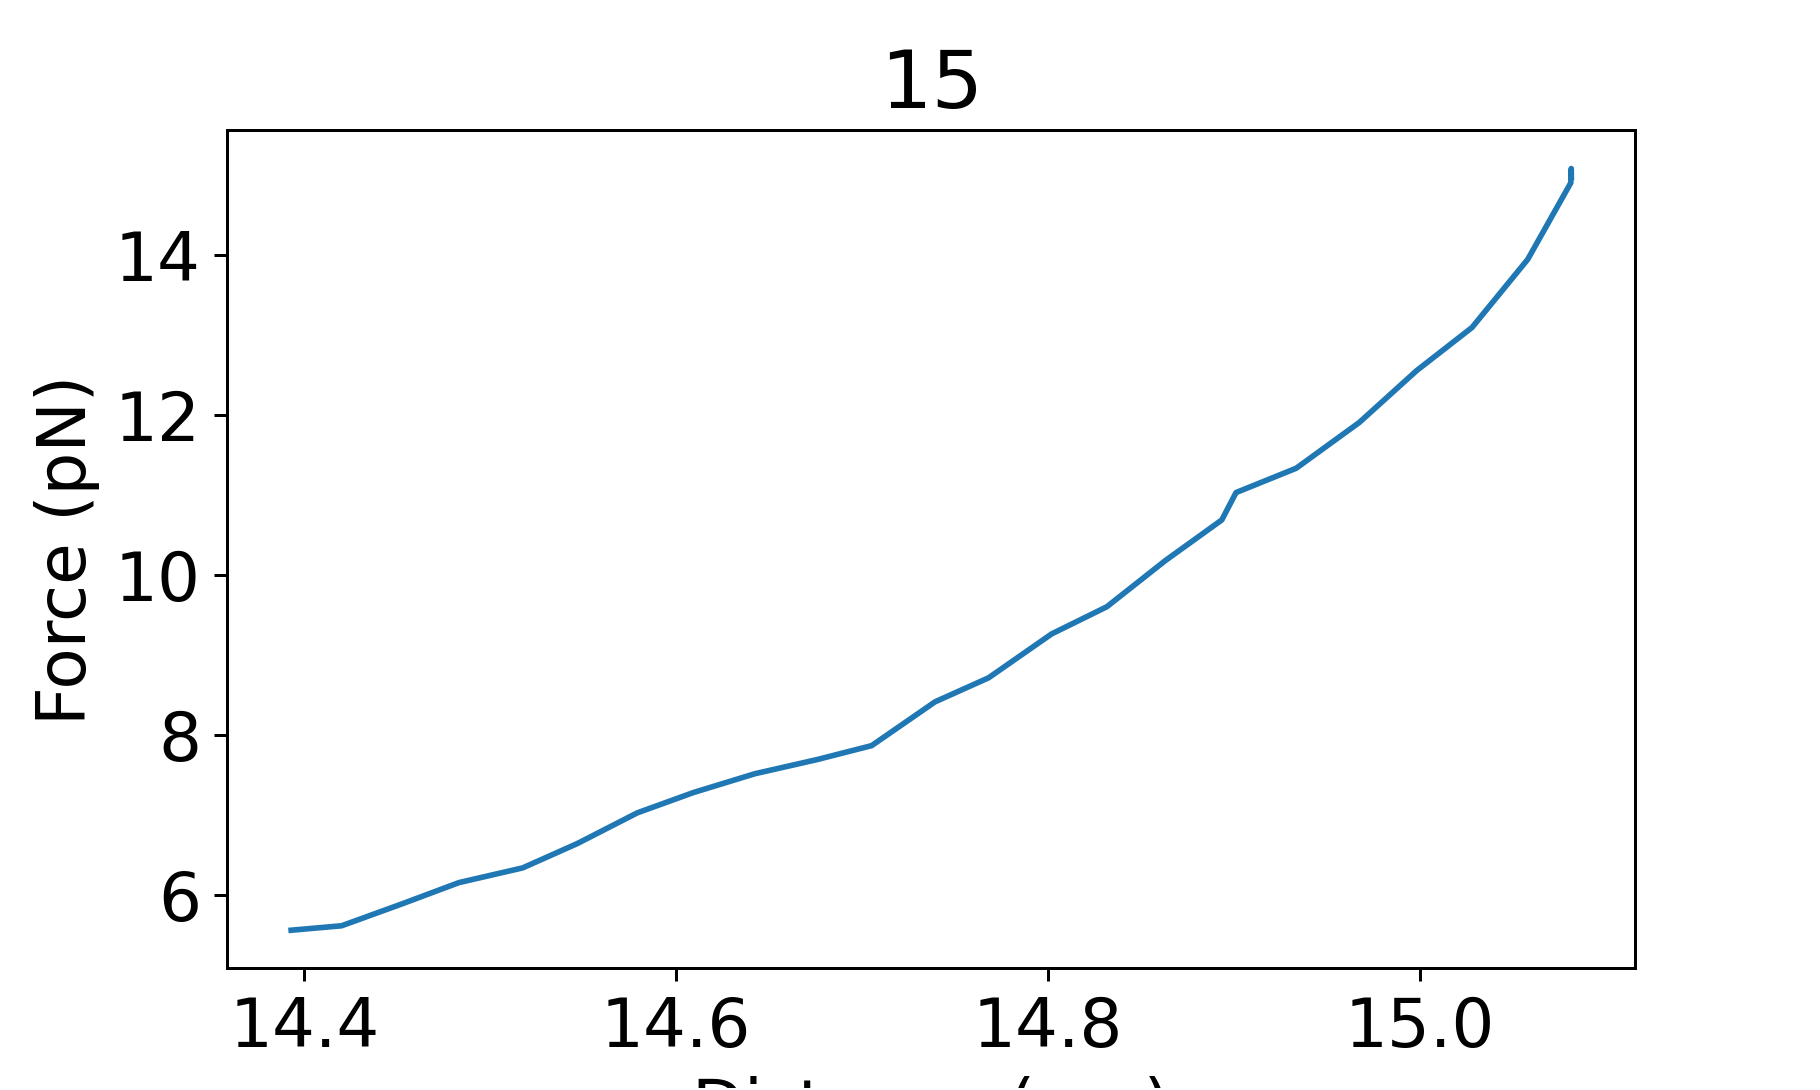

<IPython.core.display.Javascript object>


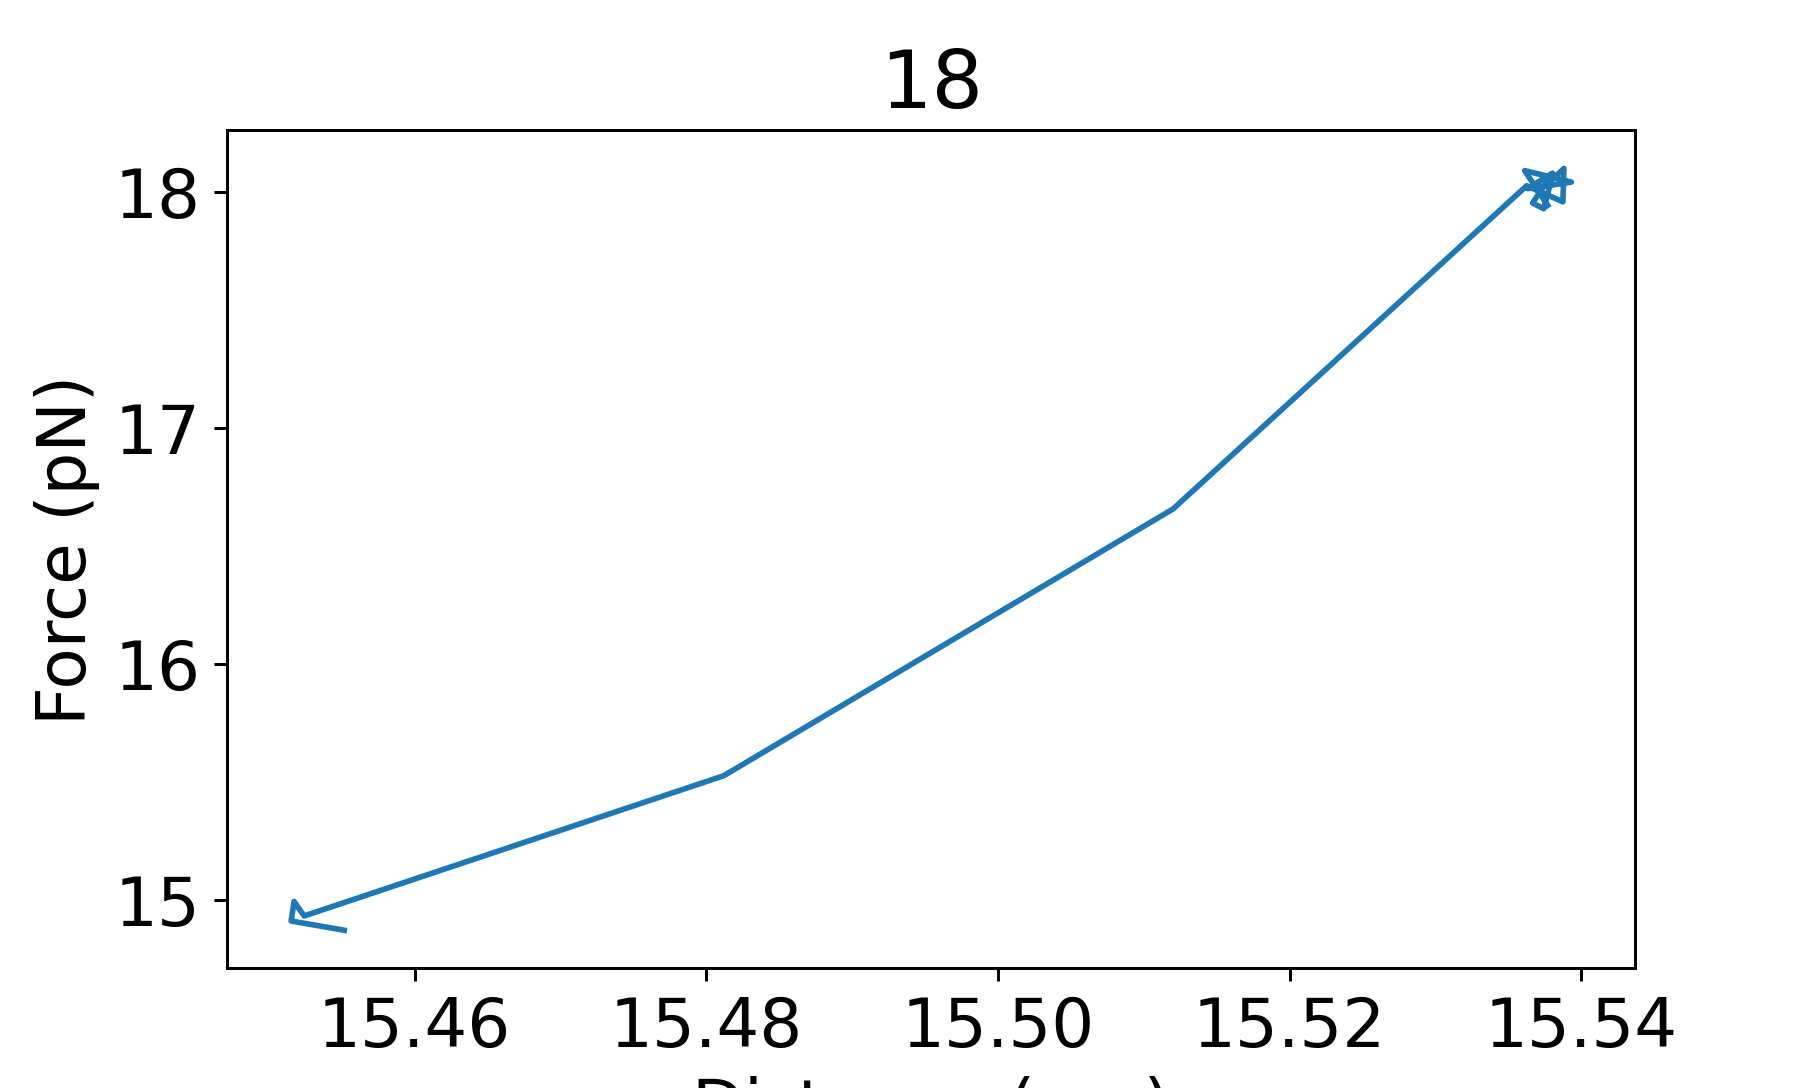

<IPython.core.display.Javascript object>


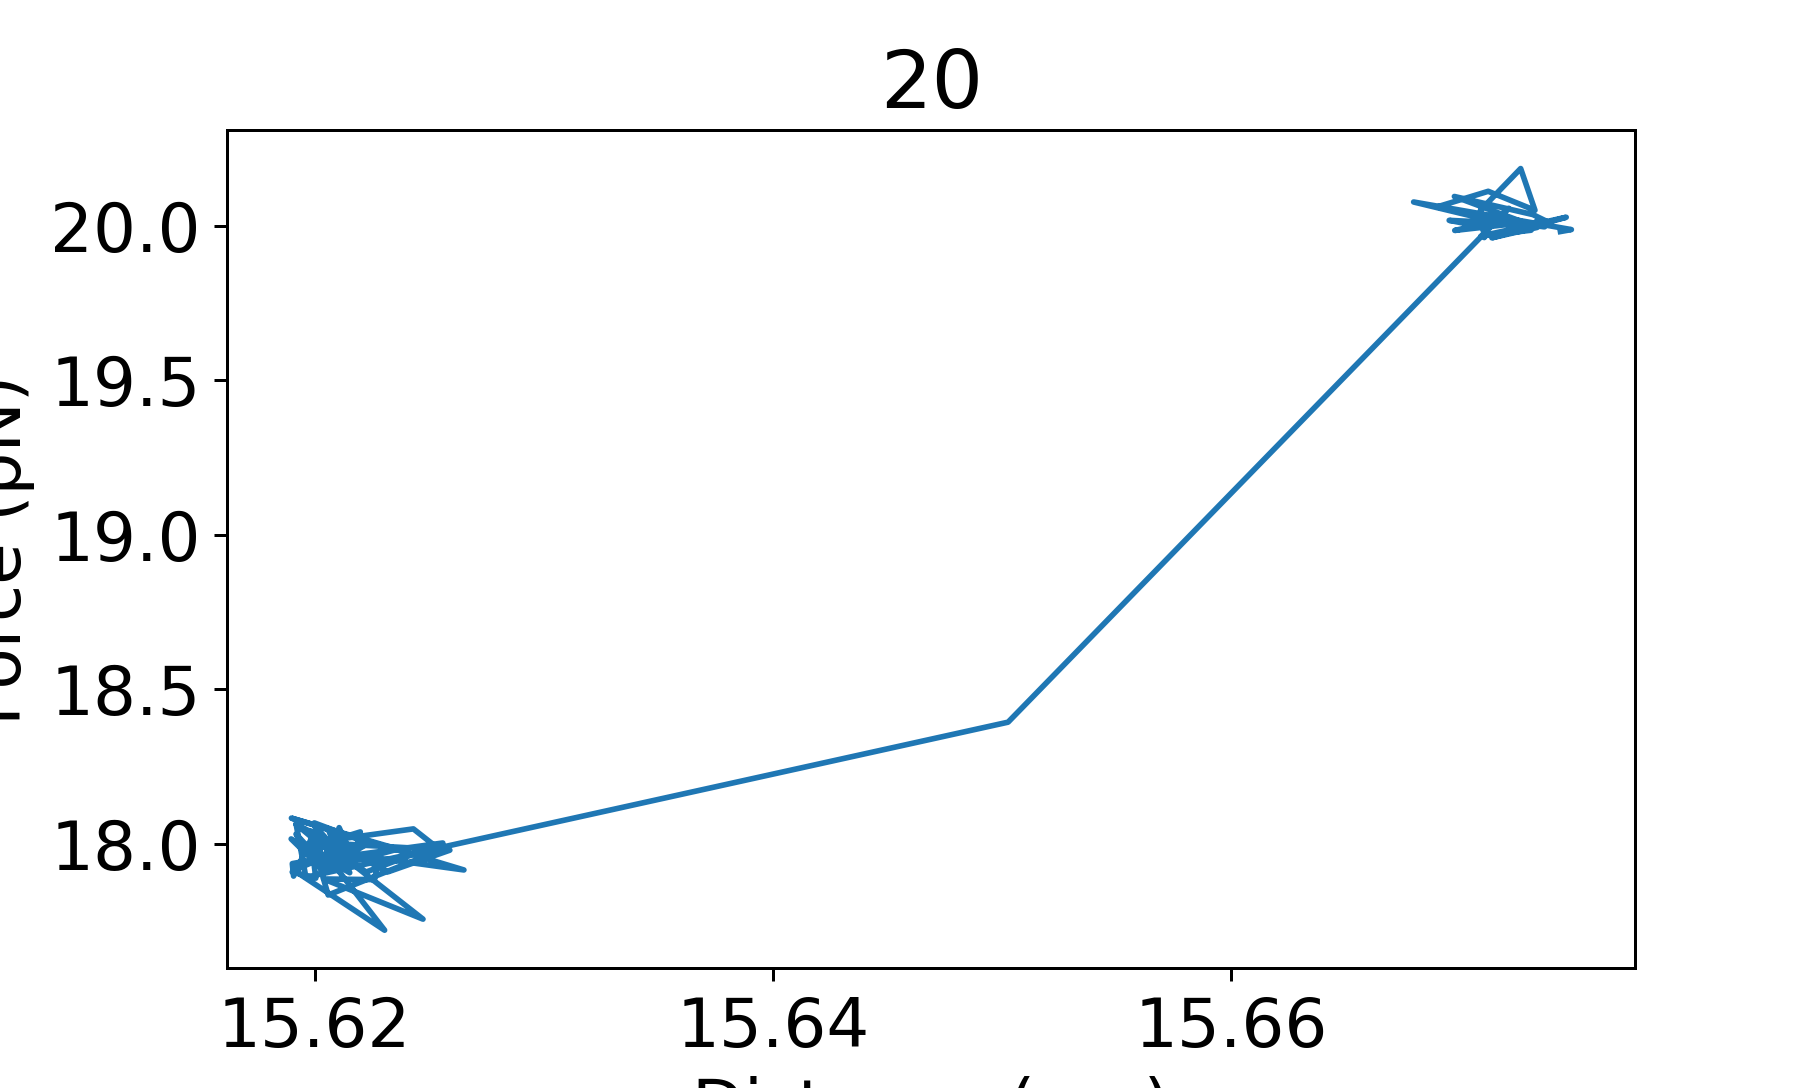

C:\Users\carca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


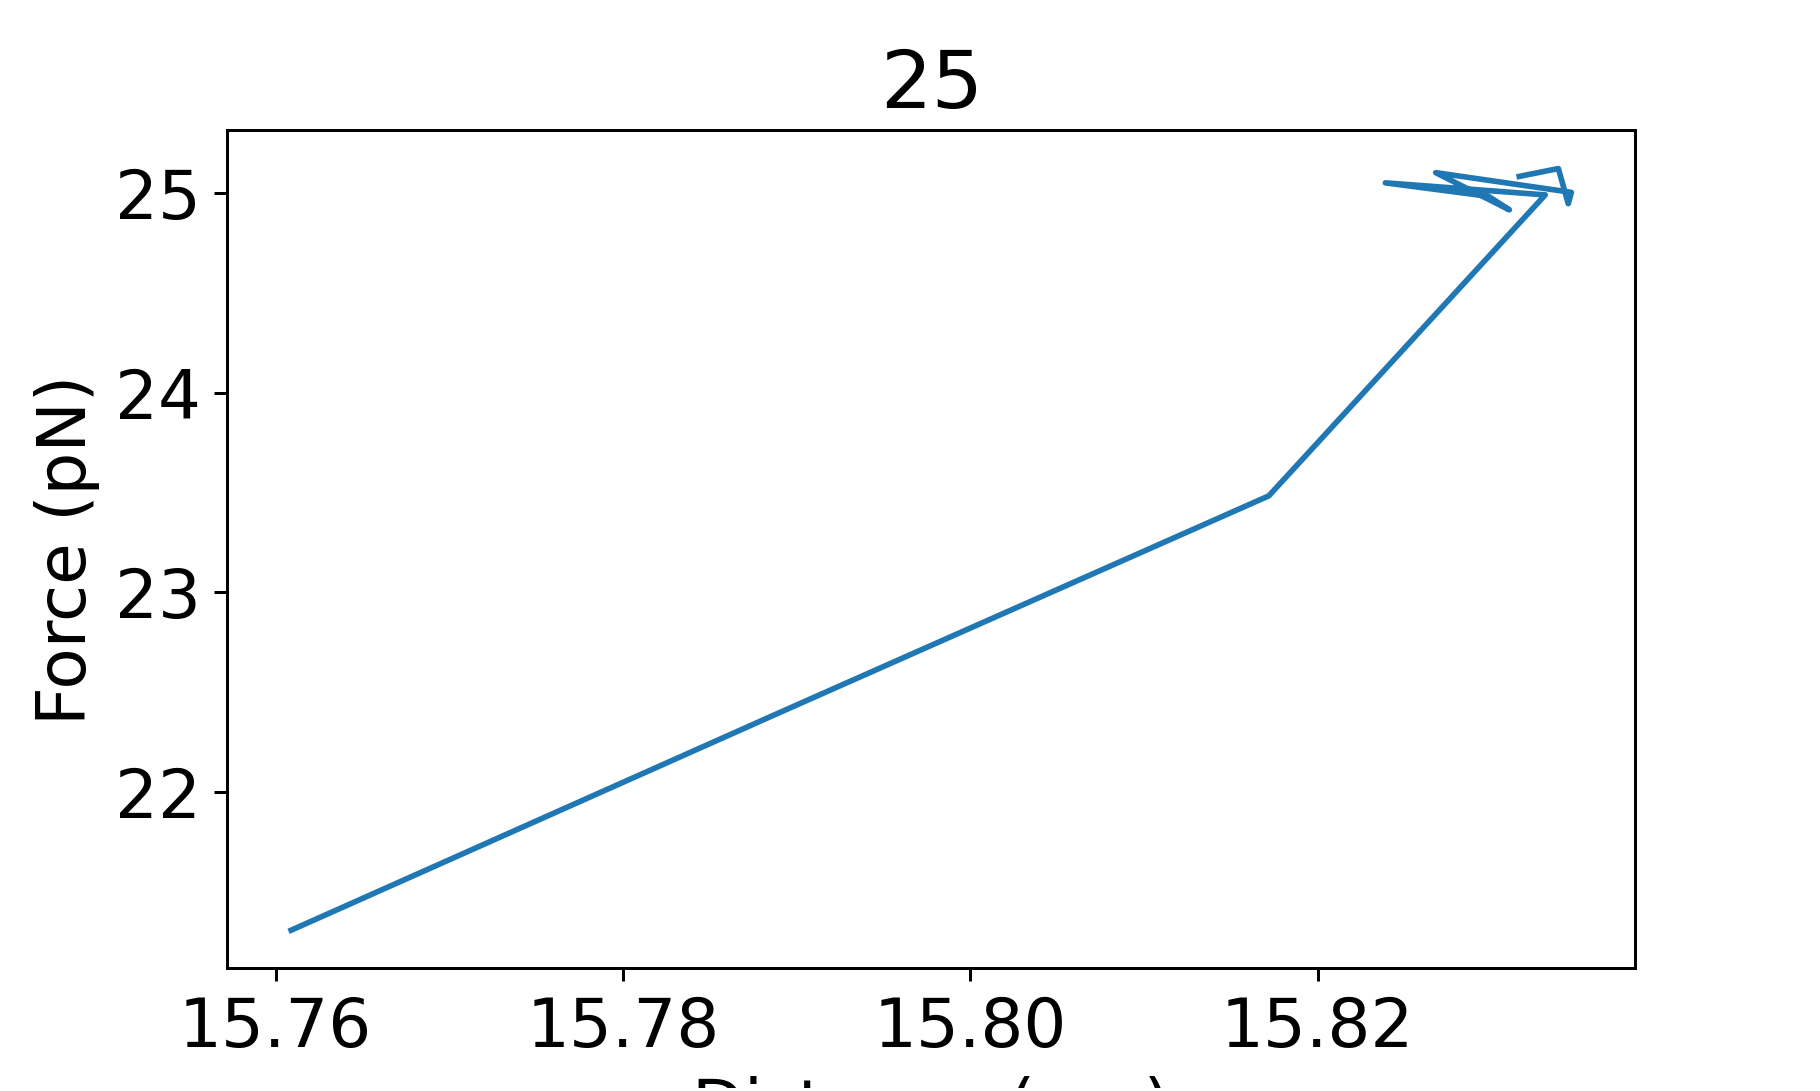

<IPython.core.display.Javascript object>


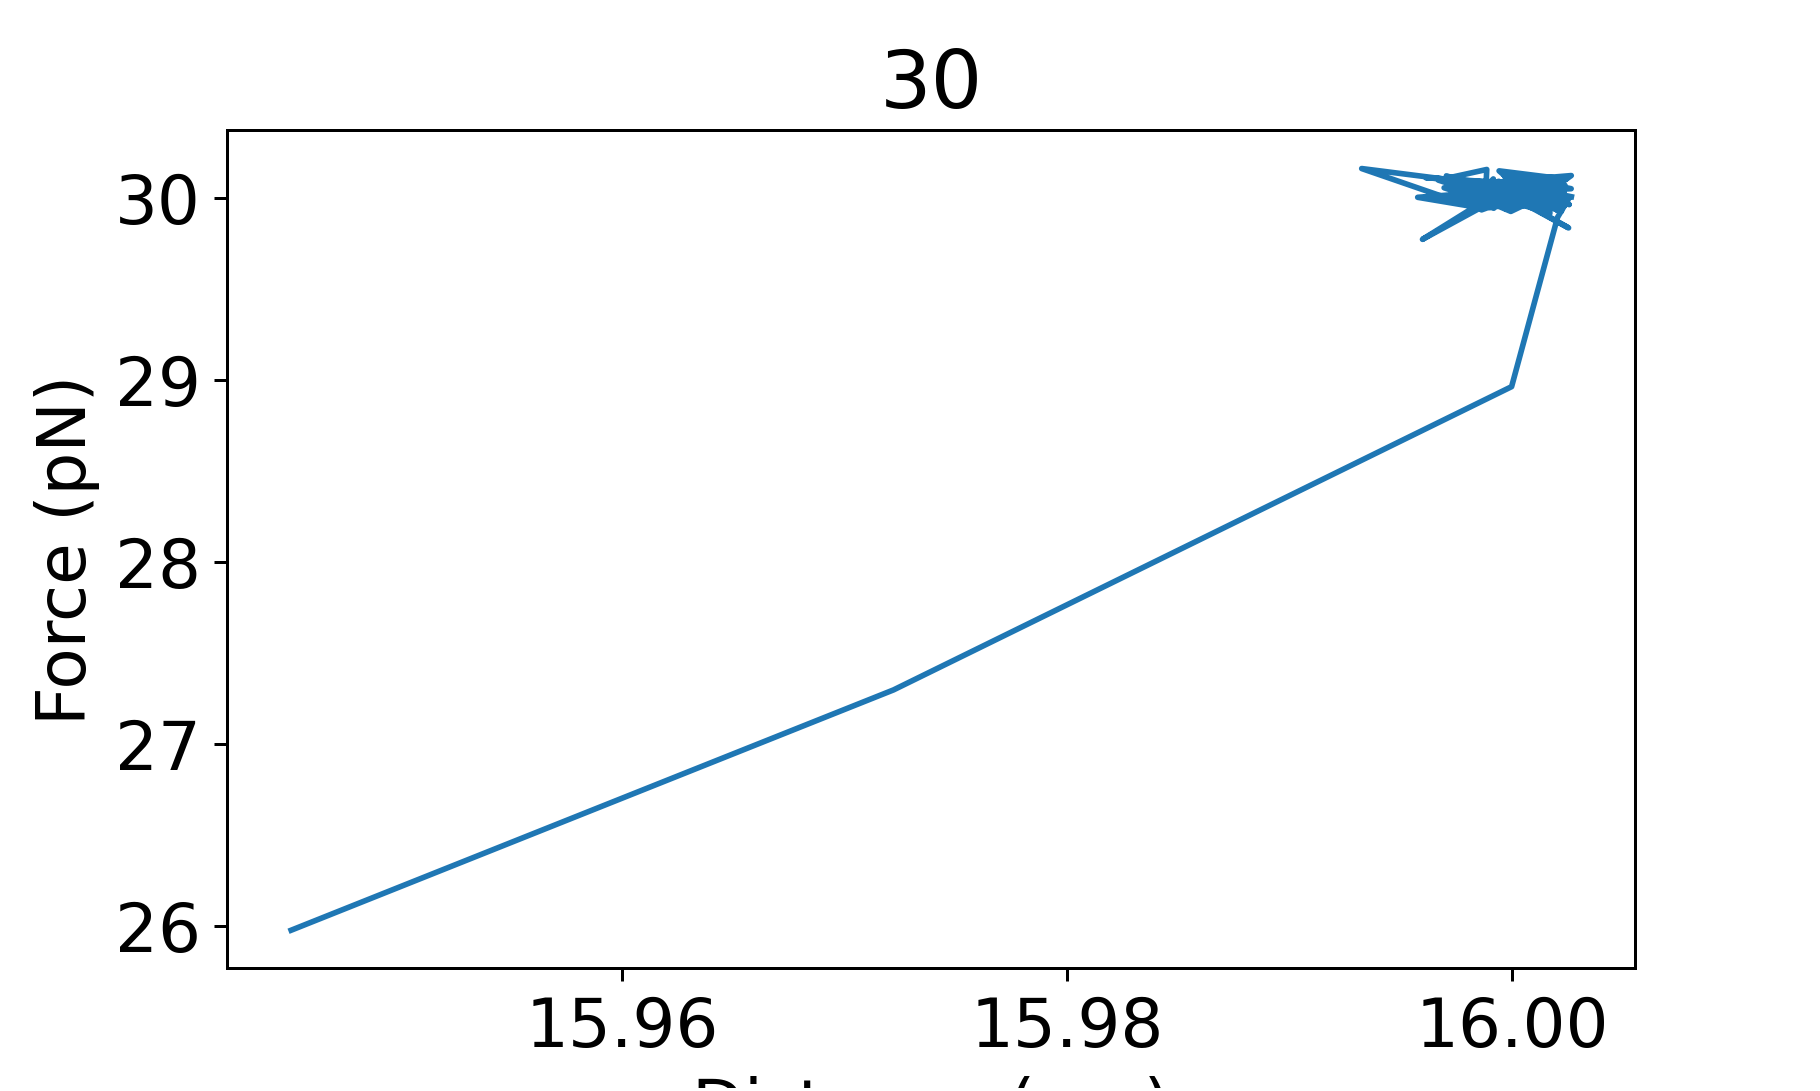

In [54]:
for i in range(len(fcs)-1):
    mask = (distance_mod>distance_mod[fcs_t_last[i]]) & (distance_mod<distance_mod[fcs_t_first[i+1]])
    plt.figure(figsize=(2.5, 1.5))
    plt.rcParams['font.size'] = 18
    plt.rcParams['figure.figsize'] = (9, 6)
    plt.plot(distance_mod[mask], force_mod[mask])
    plt.ylabel('Force (pN)')
    plt.xlabel('Distance (um)')
    plt.show()
    plt.title(fcs[i+1])

<IPython.core.display.Javascript object>


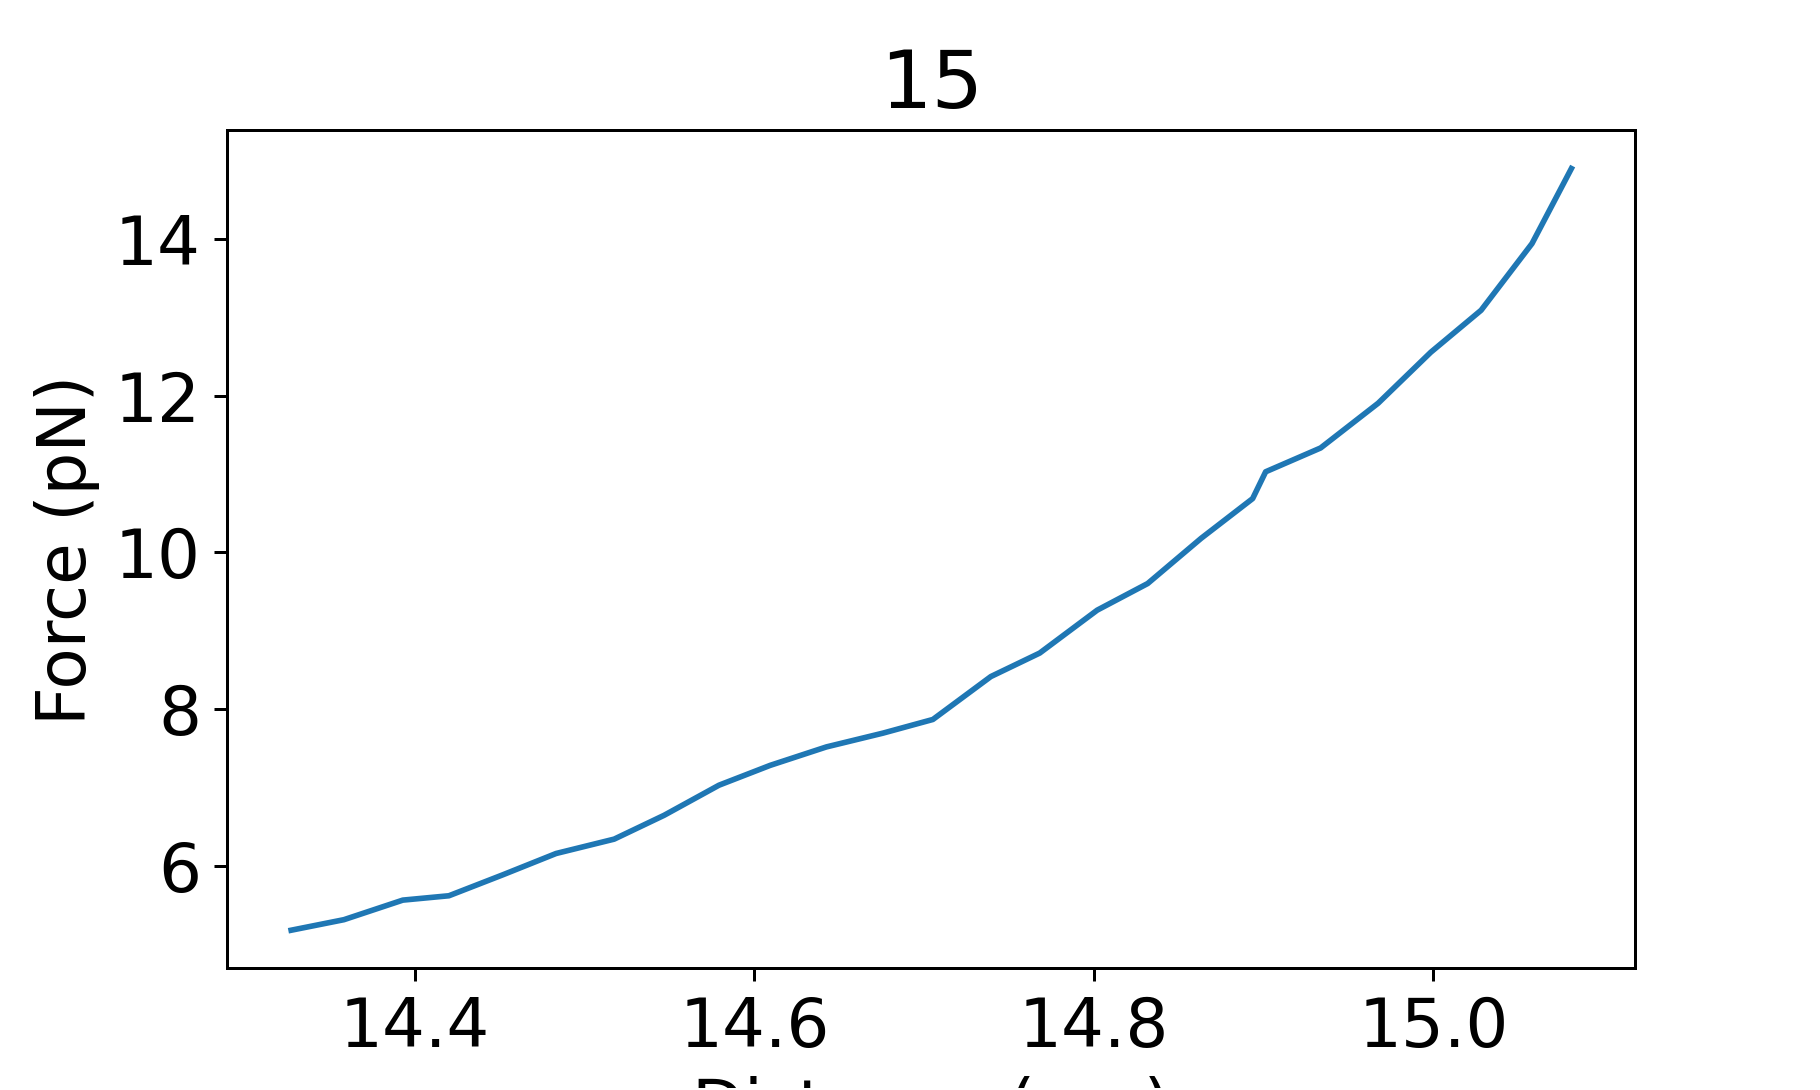

<IPython.core.display.Javascript object>


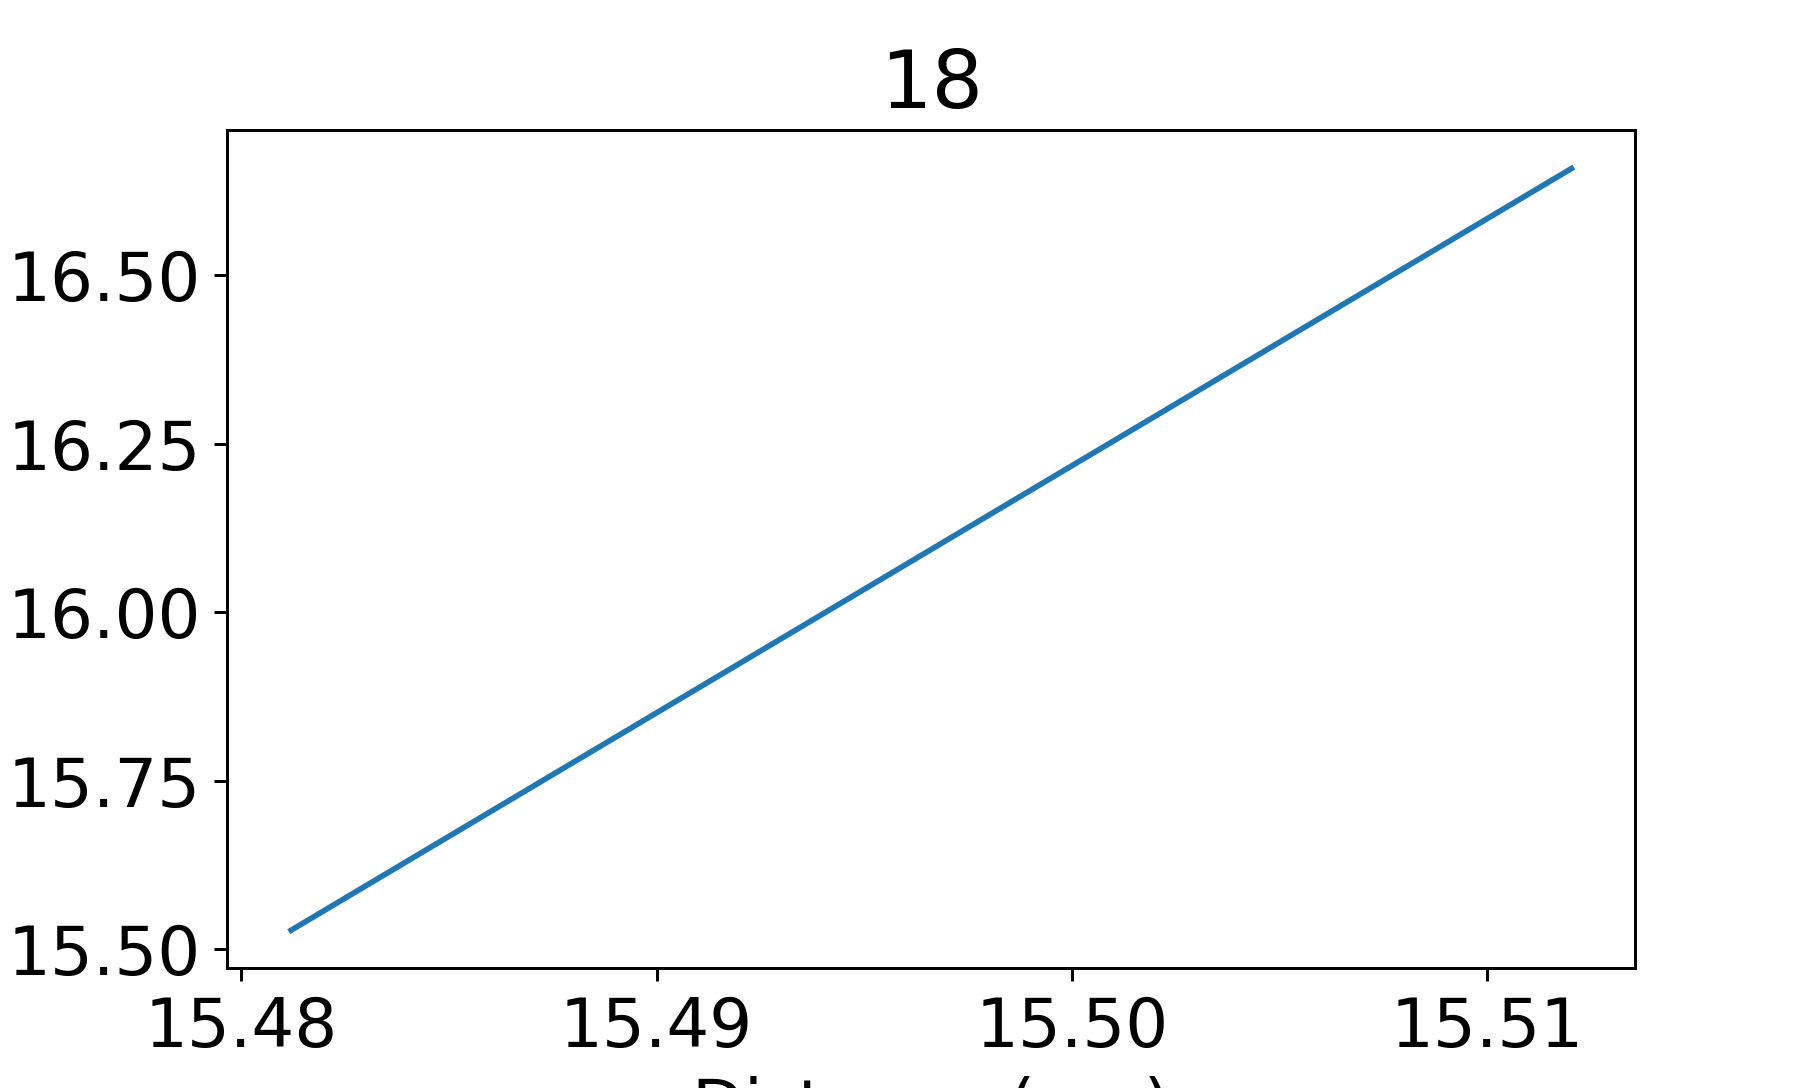

<IPython.core.display.Javascript object>


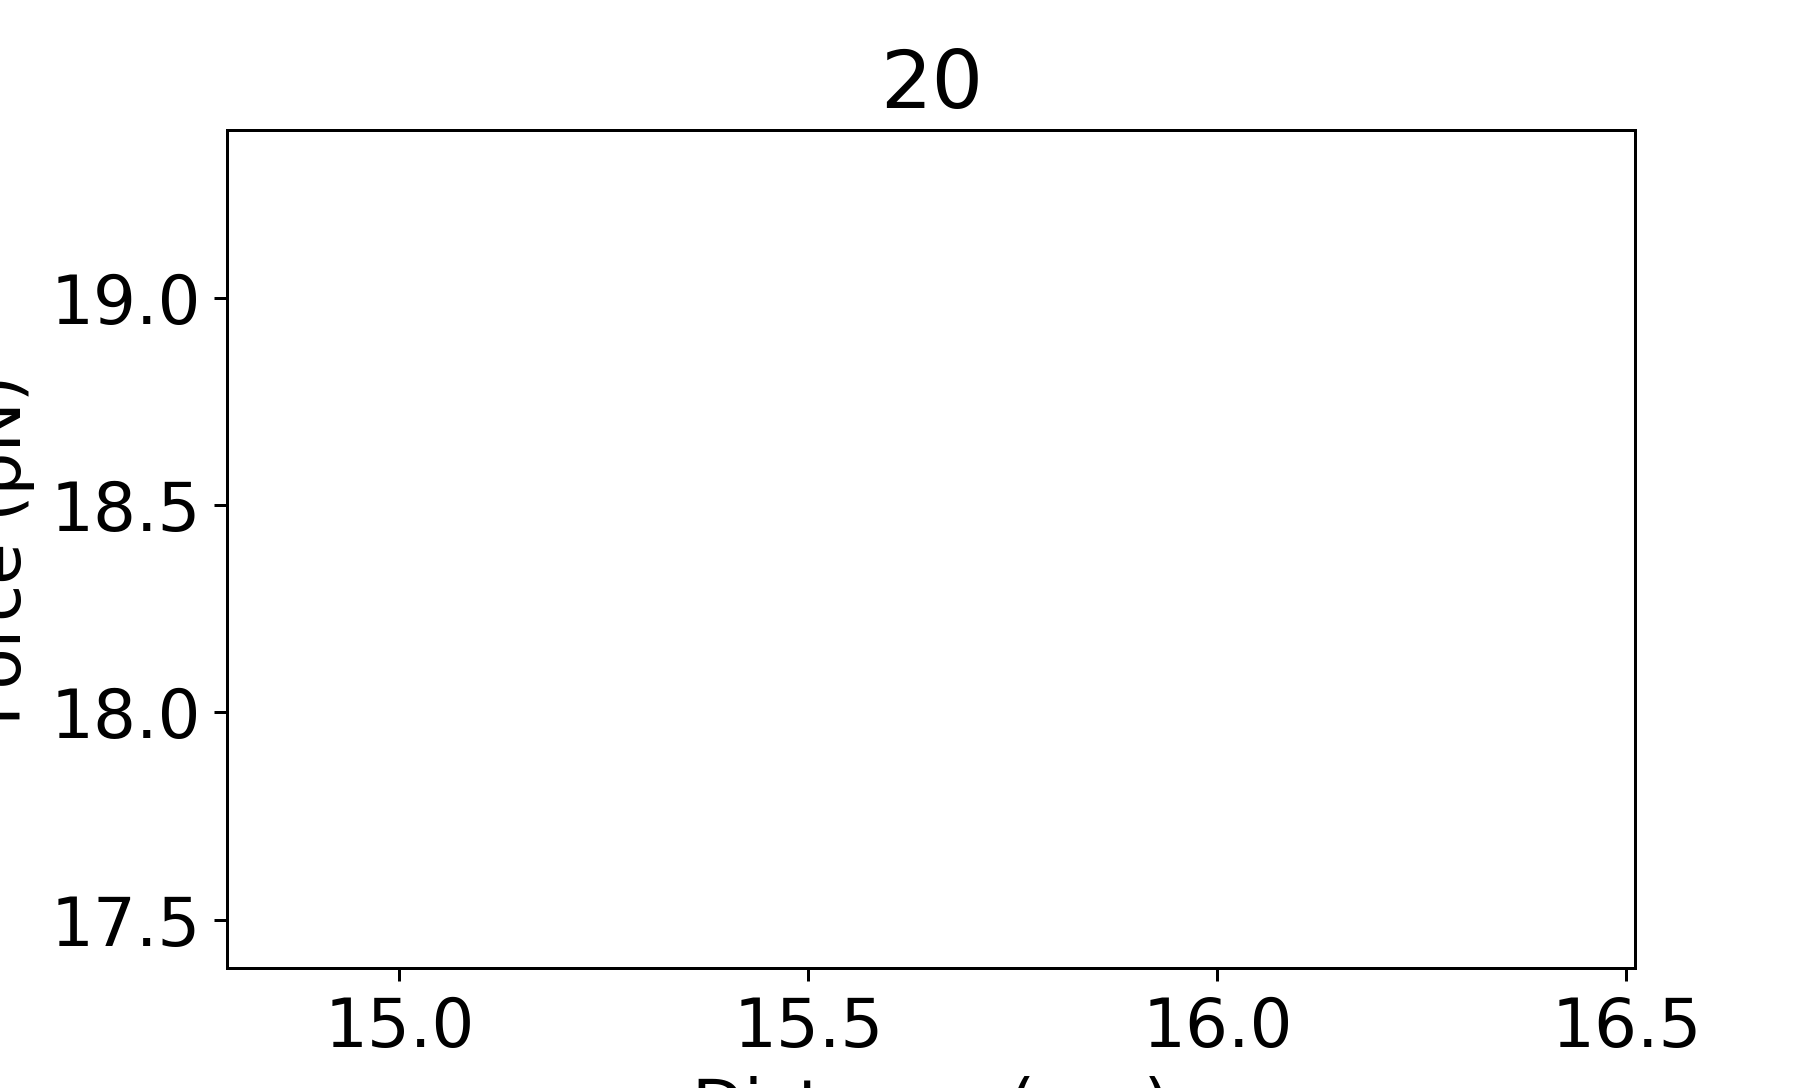

<IPython.core.display.Javascript object>


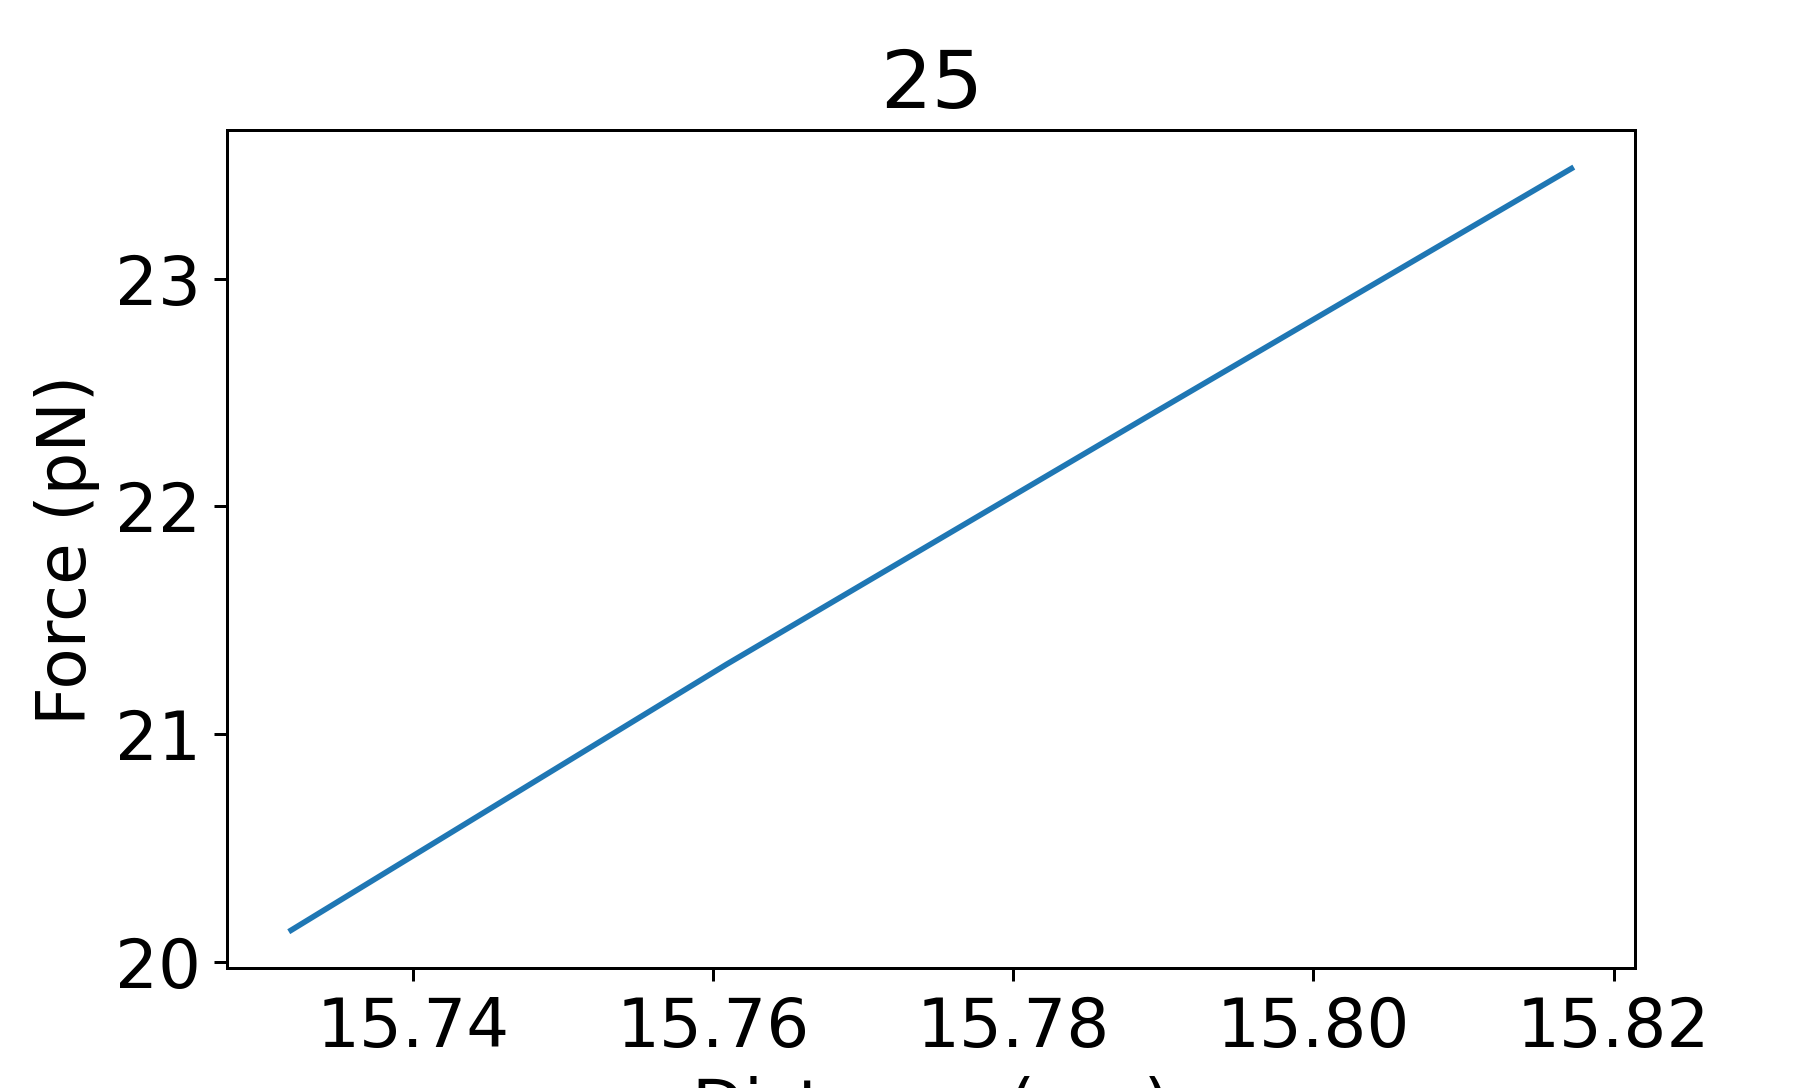

<IPython.core.display.Javascript object>


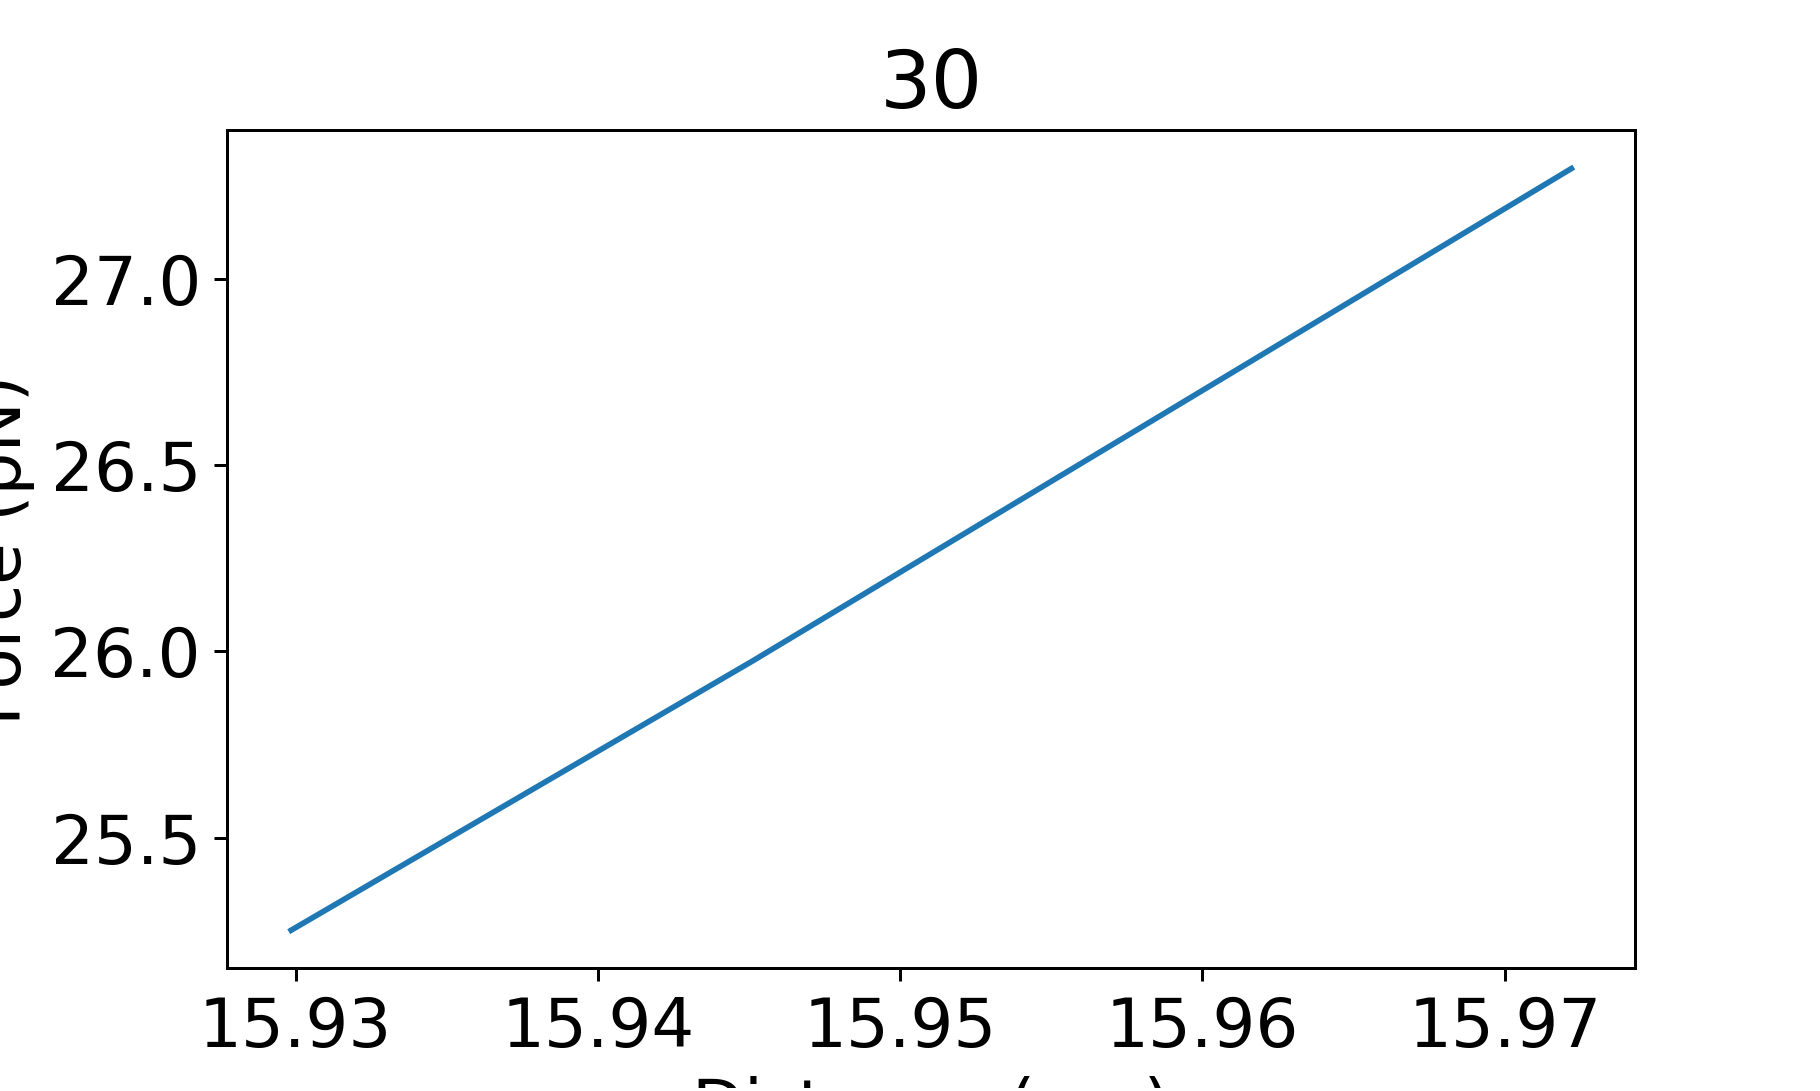

In [47]:
for i in range(len(fcs)-1):
    mask = (distance_mod>distance_mod[fcs_max_i[i]]) & (distance_mod<distance_mod[fcs_min_i[i+1]])
    plt.figure(figsize=(2.5, 1.5))
    plt.rcParams['font.size'] = 18
    plt.rcParams['figure.figsize'] = (9, 6)
    plt.plot(distance_mod[mask], force_mod[mask])
    plt.ylabel('Force (pN)')
    plt.xlabel('Distance (um)')
    plt.show()
    plt.title(fcs[i+1])

<IPython.core.display.Javascript object>


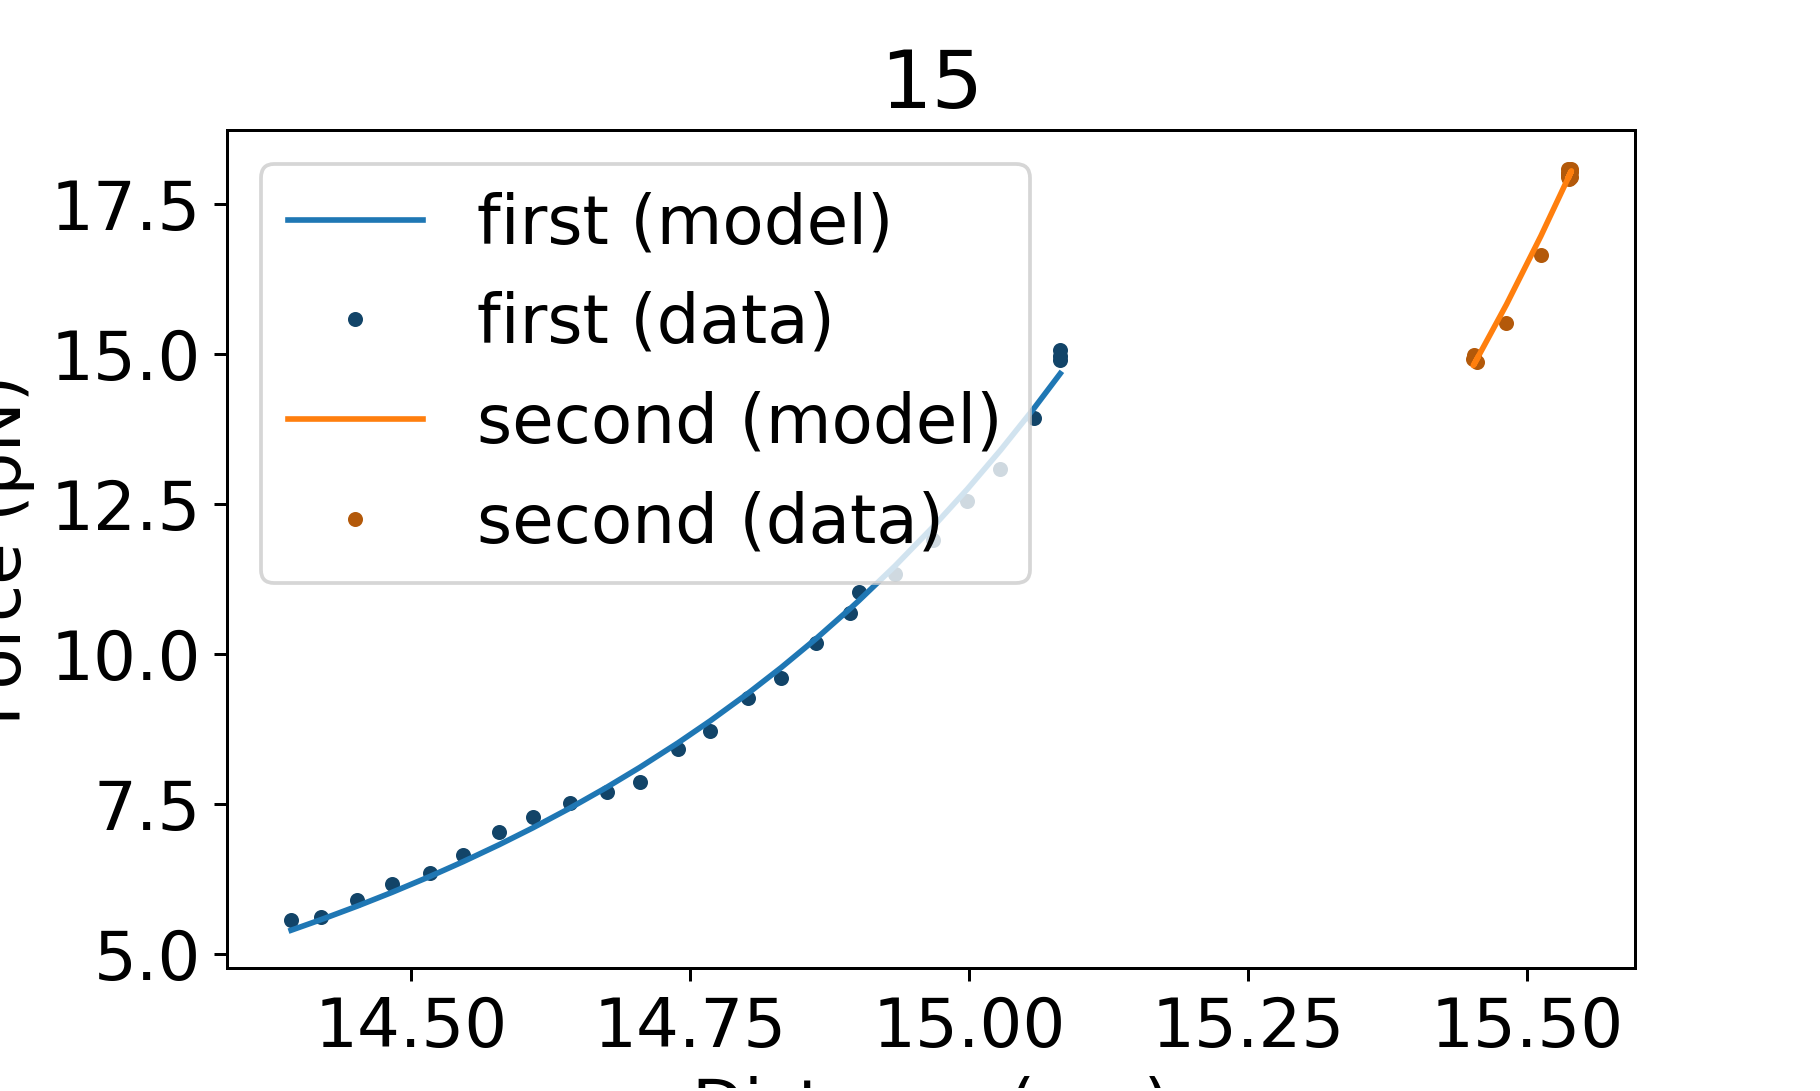

<IPython.core.display.Javascript object>


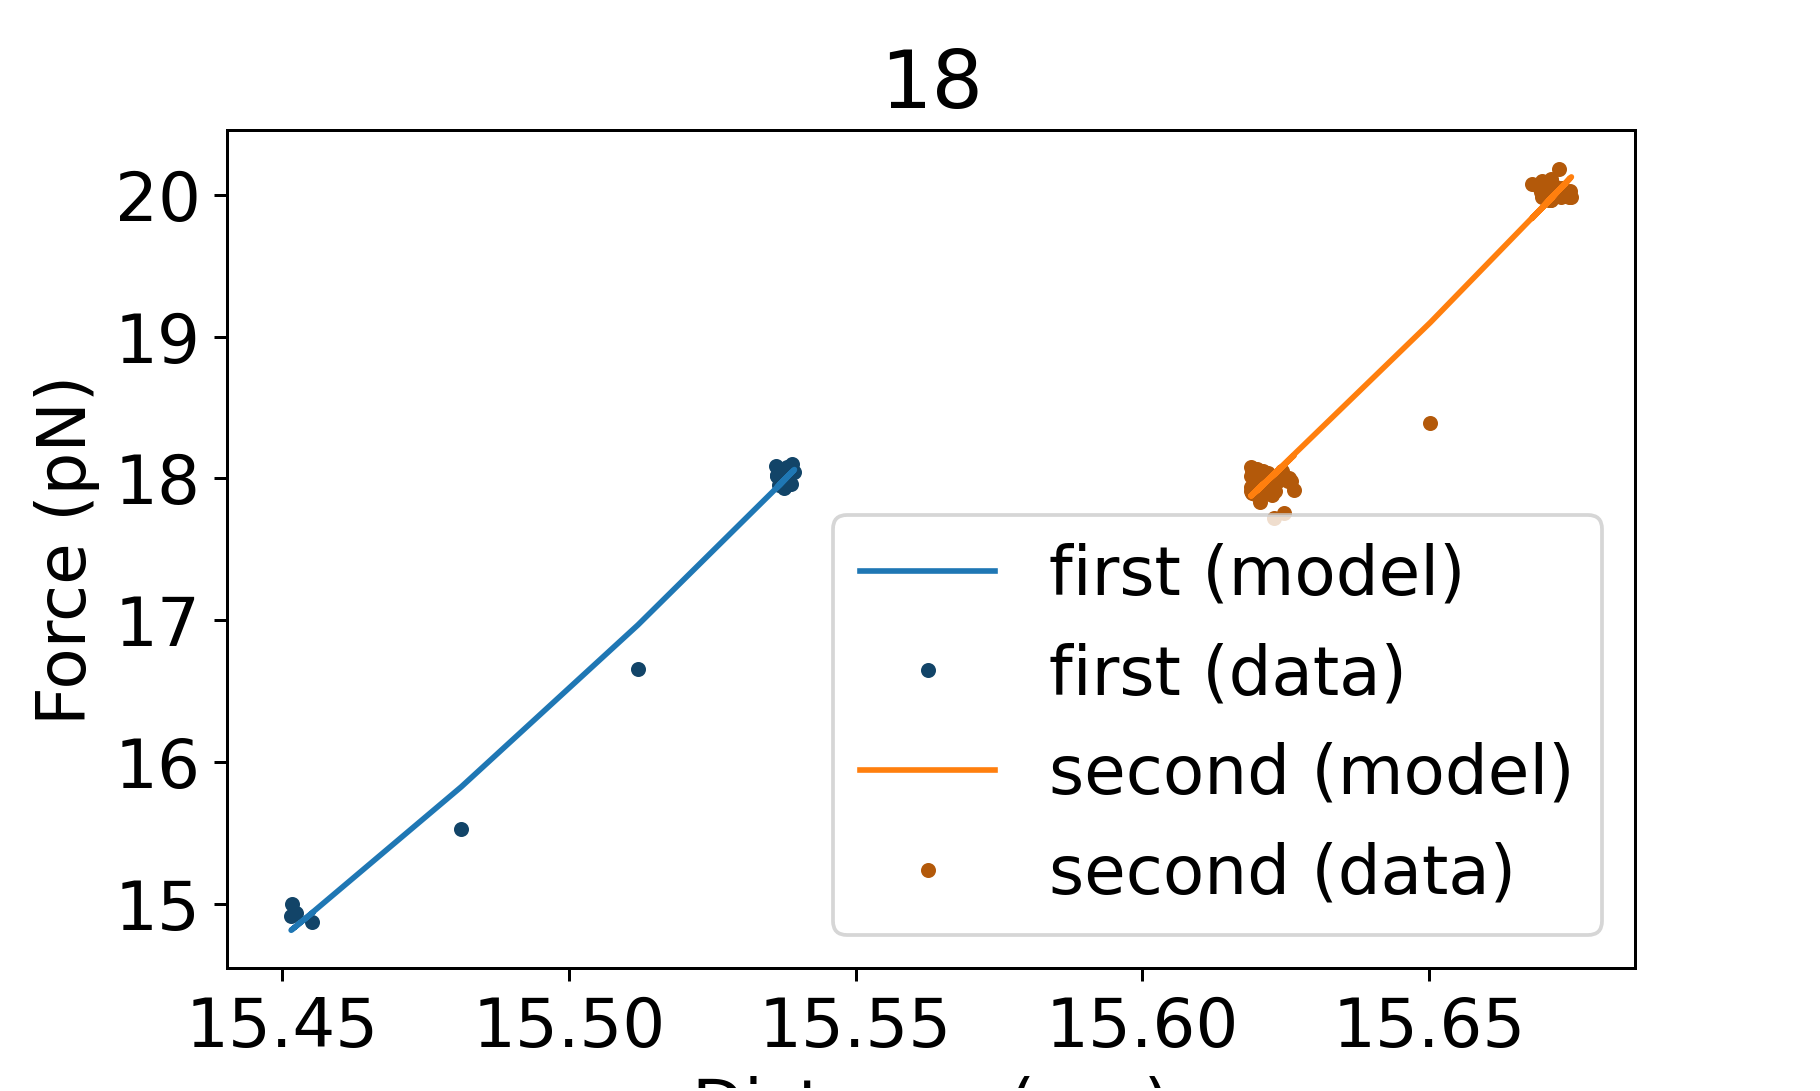

C:\Users\carca\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


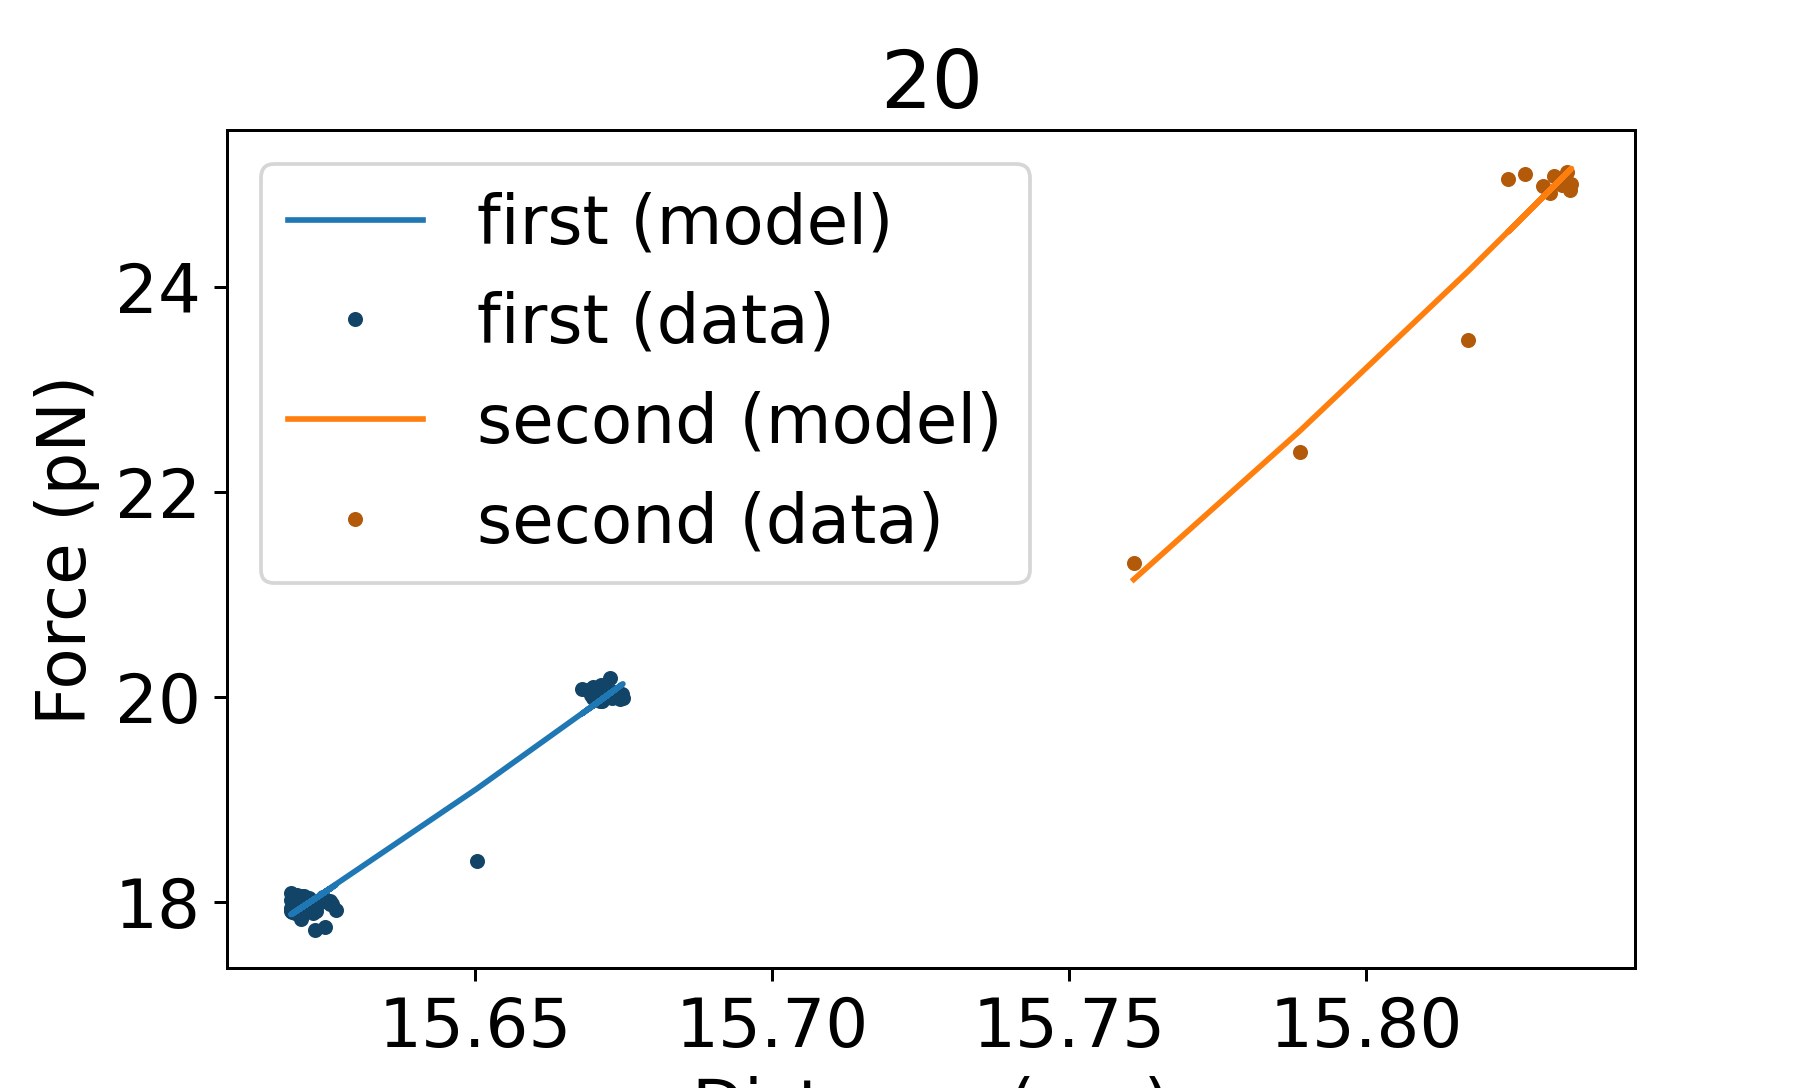

<IPython.core.display.Javascript object>


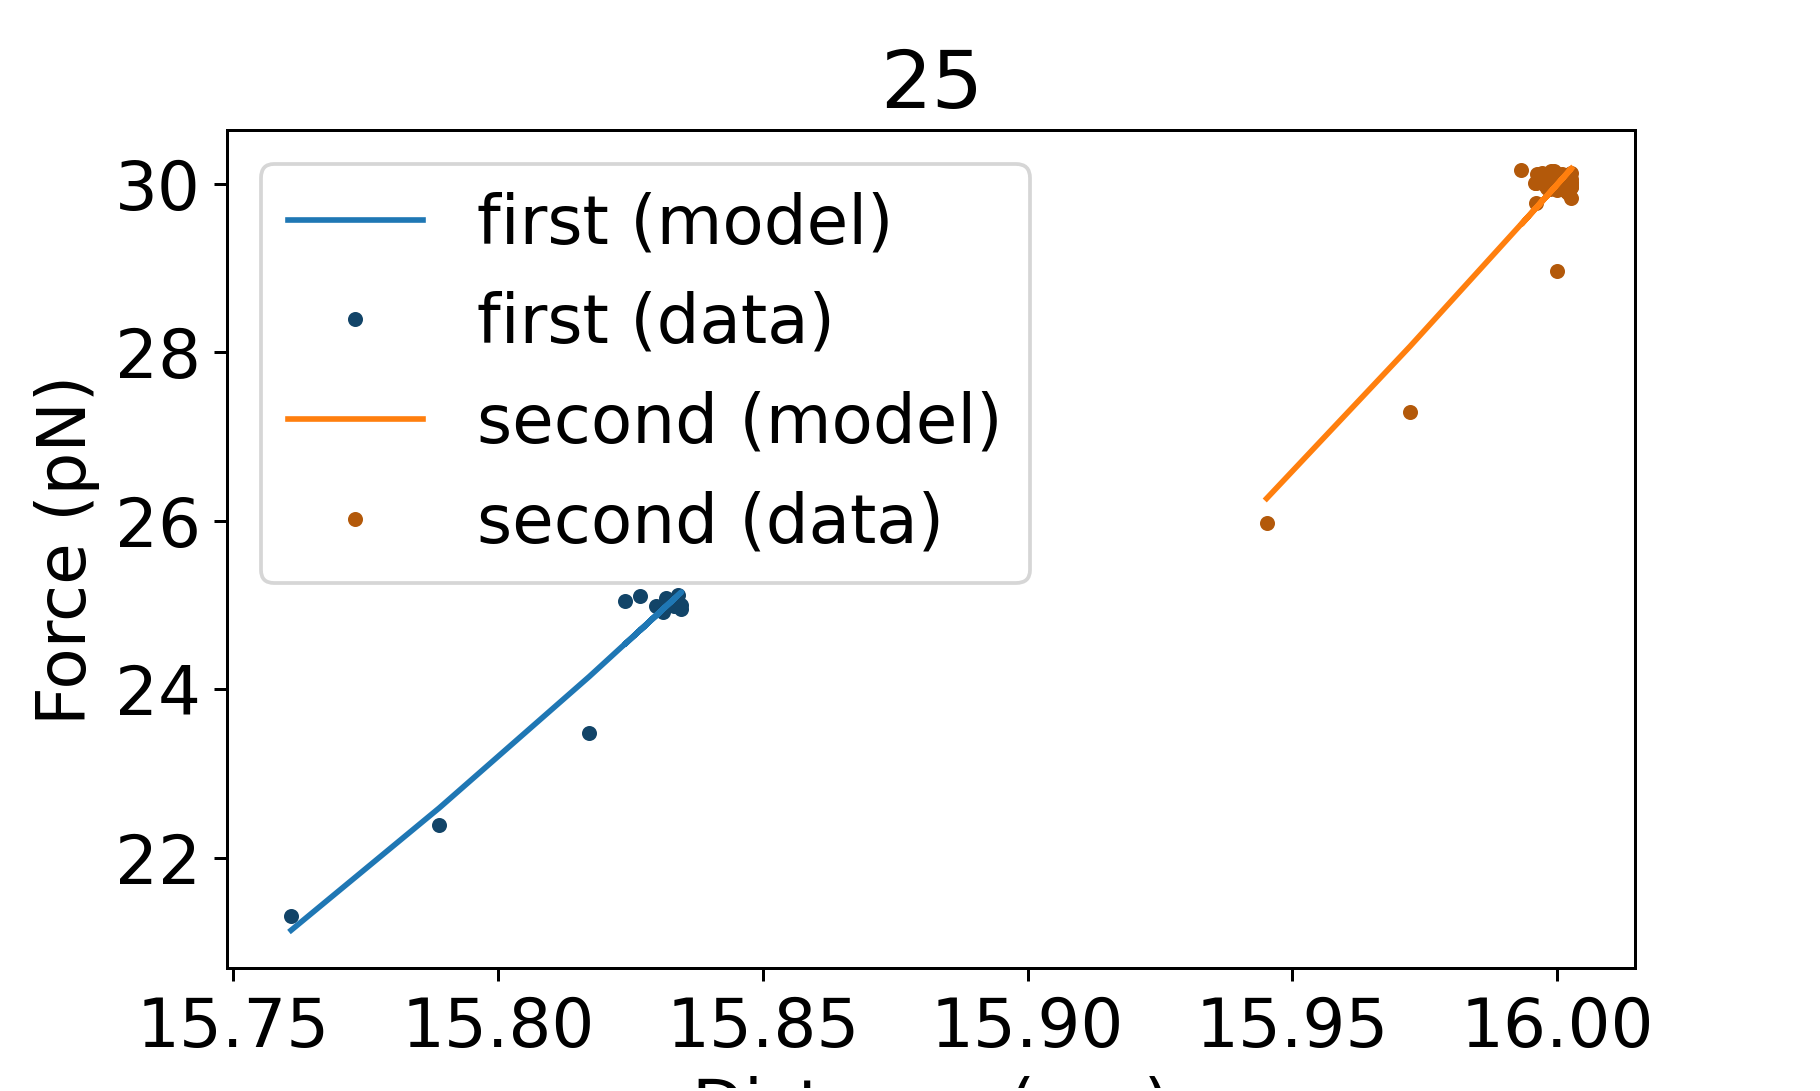

([15.816935139972104, 16.0239043571644, 16.08840517614892, 16.022306637480693],
 [15.92161732520577,
  16.102266028005275,
  16.103968872580282,
  15.913254217466346])

In [55]:
# FORWARD
time_to_cut =225
force_mod = force[time < time_to_cut]
distance_mod = distance[time < time_to_cut]
time_mod = time[time < time_to_cut]

l1= []
l2 = []

for i in range(len(fcs)-2):
    mask1 = (distance_mod>distance_mod[fcs_t_last[i]]) & (distance_mod<distance_mod[fcs_t_first[i+1]])
    mask2 = (distance_mod>distance_mod[fcs_t_last[i+1]]) & (distance_mod<distance_mod[fcs_t_first[i+2]])
    split_chrom_model = lk.inverted_odijk('DNA').subtract_independent_offset() + lk.force_offset('DNA')
    split_chrom_fit = lk.FdFit(split_chrom_model)
    split_chrom_fit.add_data('first', force_mod[mask1], distance_mod[mask1])
    split_chrom_fit.add_data('second', force_mod[mask2], distance_mod[mask2],
                   params={"DNA/Lc": "DNA/Lc_2nd", "DNA/Lp": "DNA/Lp_2nd",
                           "DNA/St": "DNA/St_2nd"})
    split_chrom_fit.fit()
    l2.append(split_chrom_fit.params['DNA/Lc_2nd'].value)
    l1.append(split_chrom_fit.params['DNA/Lc'].value)
    plt.figure(figsize=(2.5, 1.5))
    plt.rcParams['font.size'] = 18
    plt.rcParams['figure.figsize'] = (9, 6)
    split_chrom_fit.plot()
    plt.ylabel('Force (pN)')
    plt.xlabel('Distance (um)')
    plt.title(fcs[i+1])
    plt.show()
    
    
    

l1, l2

In [61]:
time_to_cut =225
force_r = force[time > time_to_cut]
distance_r = distance[time > time_to_cut]
time_r = time[time > time_to_cut]

force_f = force[time < time_to_cut]
distance_f = distance[time < time_to_cut]
time_f = time[time < time_to_cut]

print(np.where(distance_f == distance_f[time_f > 17.5][0])[0][0], np.where(distance_f == distance_f[time_f < 20][-1])[0][0])
print(np.where(distance_r == distance_r[time_r > 250][0])[0][0], np.where(distance_r == distance_r[time_r < 260][-1])[0][0])

263 300
375 524


In [19]:
# 20210125-174204 FD Curve 13
import numpy as np
time_to_cut =338
force_r = []
distance_r = []
time_r = []
force_r = force[time > time_to_cut]
distance_r = distance[time > time_to_cut]
time_r = time[time > time_to_cut]

force_f = []
distance_f = []
time_f = []
force_f = force[time < time_to_cut]
distance_f = distance[time < time_to_cut]
time_f = time[time < time_to_cut]
a = (np.where(distance_f == distance_f[time_f > 8.5][0])[0][0], np.where(distance_f == distance_f[time_f < 10.5][-1])[0][0])
b = (np.where(distance_r == distance_r[time_r > 365][0])[0][0], np.where(distance_r == distance_r[time_r < 375][-1])[0][0])
print(a, b[0], b[1])


(128, 157) 405 554


<IPython.core.display.Javascript object>


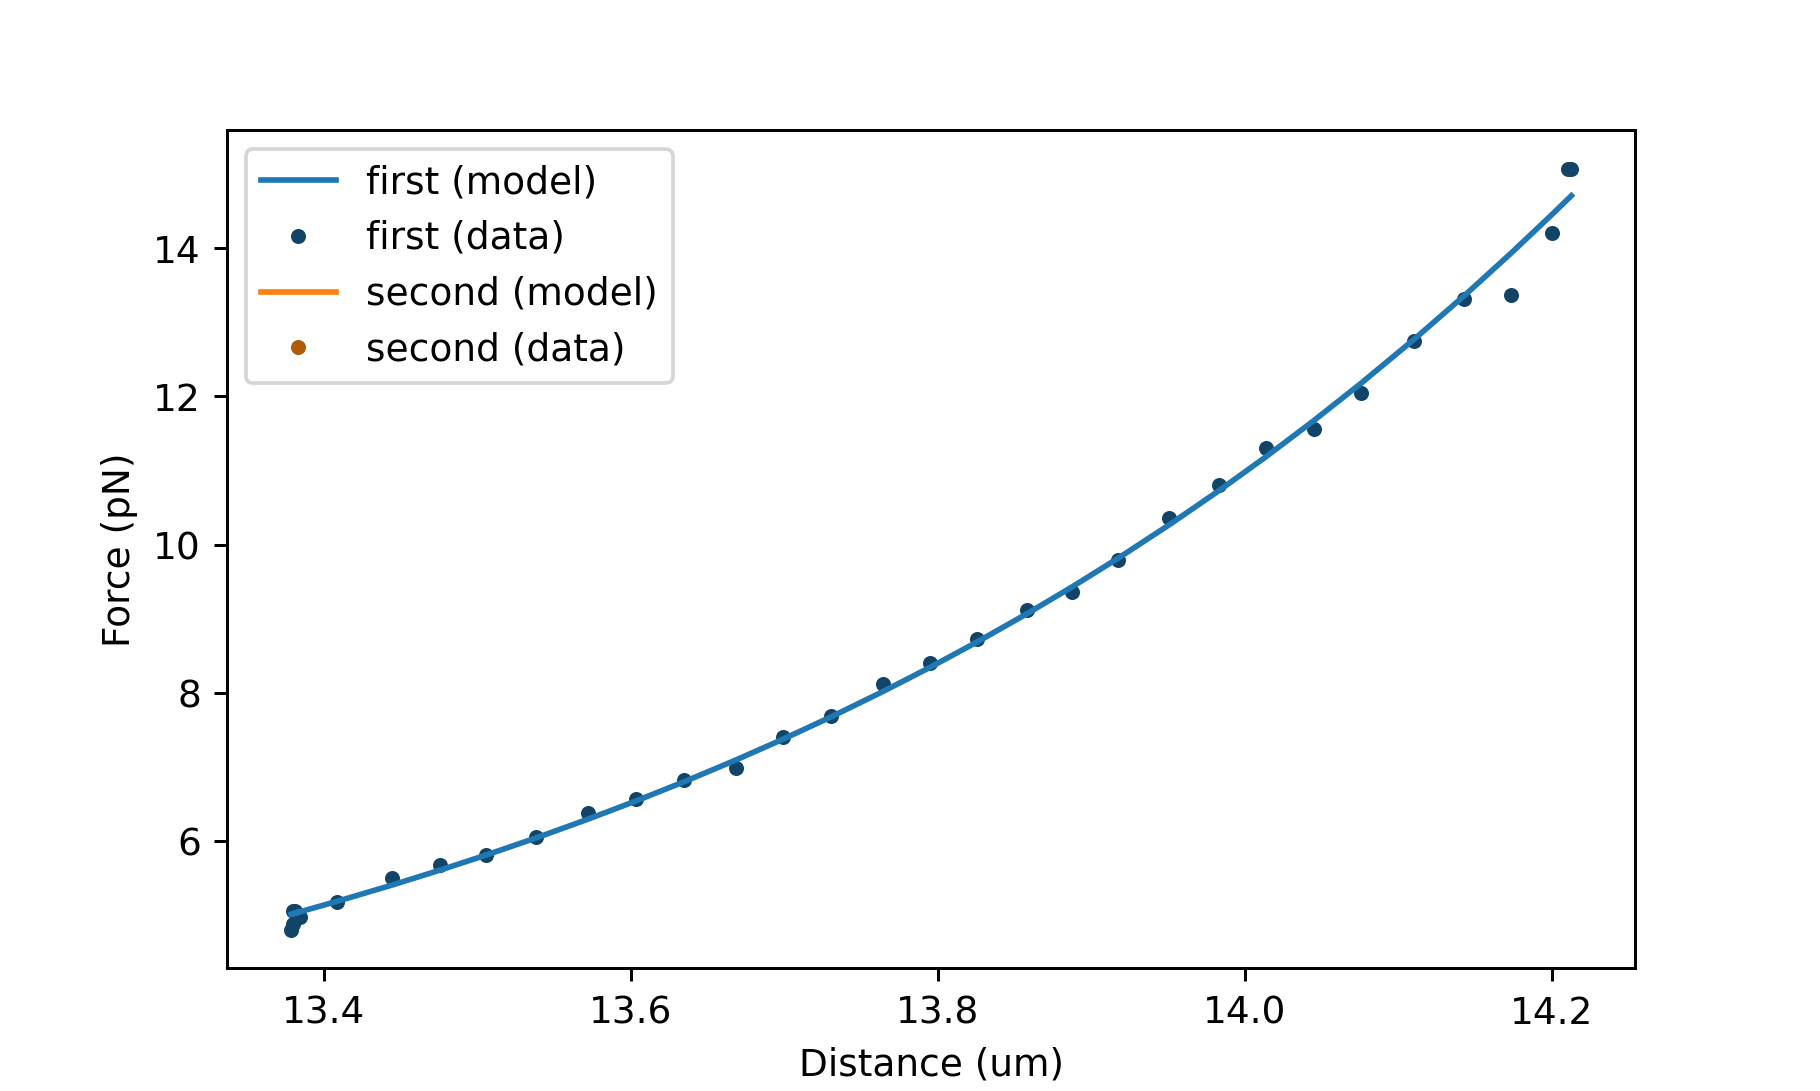

split_chrom_fit.params['DNA/Lc'].value =  15.00648530522847 split_chrom_fit.params['DNA/Lc_2nd'].value =  16.0 total number of nucs =  39.74058779086121


In [18]:
# REVERSE vs FORWARD
time_to_cut =225
force_r = force[time > time_to_cut]
distance_r = distance[time > time_to_cut]
time_r = time[time > time_to_cut]

force_f = force[time < time_to_cut]
distance_f = distance[time < time_to_cut]
time_f = time[time < time_to_cut]
l1 = []
l2 = []

mask1 = (distance_f>distance_f[a[0]]) & (distance_f<distance_f[a[1]])
mask2 = (distance_r>distance_r[b[0]]) & (distance_r<distance_r[b[1]])
split_chrom_model = lk.inverted_odijk('DNA').subtract_independent_offset() + lk.force_offset('DNA')
split_chrom_fit = lk.FdFit(split_chrom_model)
split_chrom_fit.add_data('first', force_f[mask1], distance_f[mask1])
split_chrom_fit.add_data('second', force_r[mask2], distance_r[mask2],
               params={"DNA/Lc": "DNA/Lc_2nd", "DNA/Lp": "DNA/Lp_2nd",
                       "DNA/St": "DNA/St_2nd"})
split_chrom_fit.fit()
l2.append(split_chrom_fit.params['DNA/Lc_2nd'].value)
l1.append(split_chrom_fit.params['DNA/Lc'].value)
plt.figure(figsize=(2.5, 1.5))
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (9, 6)
split_chrom_fit.plot()
plt.ylabel('Force (pN)')
plt.xlabel('Distance (um)')
# plt.title(fcs[i+1])
plt.show()
    
    
    

print("split_chrom_fit.params['DNA/Lc'].value = ", str(l1[0]), "split_chrom_fit.params['DNA/Lc_2nd'].value = ", str(l2[0]),'total number of nucs = ', (l2[0]-l1[0])/0.025)

In [56]:
sum([round(abs(l2_i-l1_i)/0.03) for l1_i, l2_i in zip(l1, l2)])


11

In [53]:
directory = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\lambda nucleosome array\700-1 Condition Data Used\2021-01-25 dual color 700-1 array SWR1\h5\scans and FD curves' + '/'
file_name = '20210125-174204 FD Curve 2'

import numpy as np
print(np.where(distance_mod == distance_mod[time_mod > 105.8][0])[0][0], np.where(distance_mod == distance_mod[time_mod < 106.2][-1])[0][0], fcs_t_first, fcs_t_last)
fcs_t_last[2] = 1588
print(np.where(distance_mod == distance_mod[time_mod > 105.8][0])[0][0], np.where(distance_mod == distance_mod[time_mod < 106.2][-1])[0][0], fcs_t_first, fcs_t_last)



1588 1593 [145, 297, 1117, 1592, 2043, 2660] [ 273 1114 1591 2039 2656 3112]
1588 1593 [145, 297, 1117, 1592, 2043, 2660] [ 273 1114 1588 2039 2656 3112]
